In [1]:
#!pip install patsy

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
import pandas as pd

In [3]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf

# Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
# Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


#
# Y(t) = 1 + 0.6 E(t-1) + 1 - 0.2Y(t-1)
#ar1 = np.array([1, 0.6])
#ma1 = np.array([1, -0.2])
#y4=ϵ4+(−0.3)⋅ϵ3−y3⋅(−0.5)=0.5⋅y3−0.3⋅ϵ3+ϵ4.


def dump_adfuller(data):
  adfuller_res = adfuller( data )
  
  if adfuller_res[1] > 0.05:
    return f"Non-stationary with p :{ round(adfuller_res[1],2) }"
  else:  
    return f"Stationary with p :{ round(adfuller_res[1],2) }"

def gen_arma_data(ar1,ma1,lags):  
  arma_data = ArmaProcess(ar1, ma1).generate_sample(nsample=200)
  
  plot_summary( ar1,ma1,lags ,arma_data)
  
  return arma_data  

def plot_summary(ar1,ma1,lags,orig_data):
    
  fig, axs = plt.subplots(1, 3 ,figsize=(25,5))
  
  pd_series = pd.DataFrame(orig_data)
  moving_average = pd_series.rolling(window=10).mean()
  moving_std = pd_series.rolling(window=10).std()

  axs[ 0].plot(orig_data, color='blue', label='Original')
  axs[ 0].plot(moving_average, color='red', label='Moving Avg')
  axs[ 0].plot(moving_std, color='orange', label='Moving Std')
  axs[ 0].legend(loc='best')
  axs[ 0].set_title(f" Params ar {ar1}  ma {ma1}")
  #plt.xlim([0, 200])
  
  aa = sm.graphics.tsa.plot_acf(orig_data ,ax=axs[ 1],lags=lags,use_vlines=True)
  axs[ 1].set_title('ACF')

  sm.graphics.tsa.plot_pacf(orig_data ,ax=axs[2],lags=lags,use_vlines=True)
  axs[2].set_title('PACF :'+dump_adfuller( orig_data ))

  #lag_acf = acf(orig_data, nlags=lags)  
  #axs[3].plot(lag_acf)
  #axs[3].set_title("LAG ACF : "+dump_adfuller( orig_data ))

  fig.tight_layout()
  
  return orig_data    

  

In [4]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

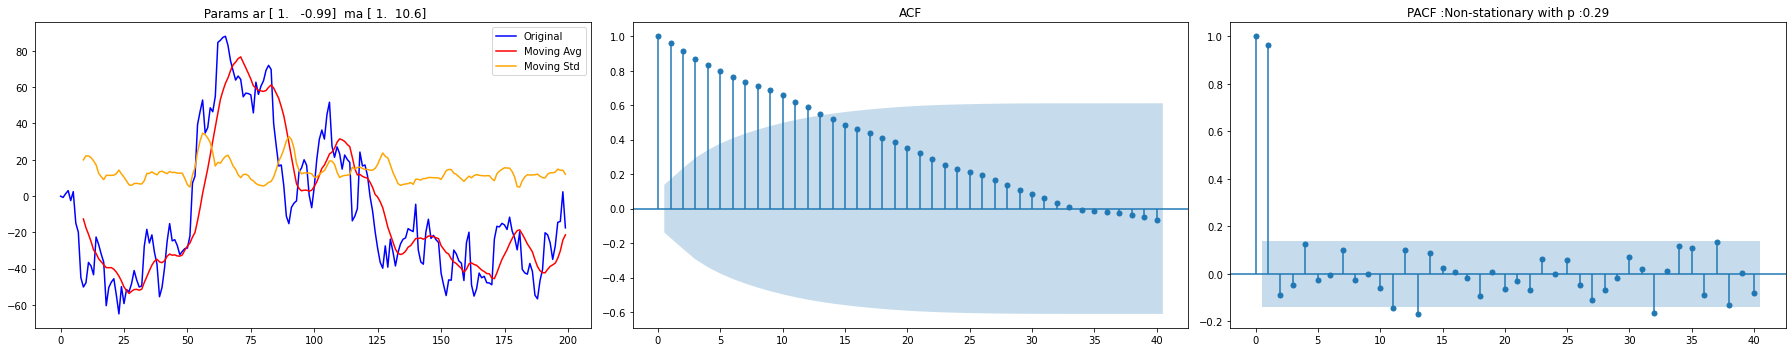

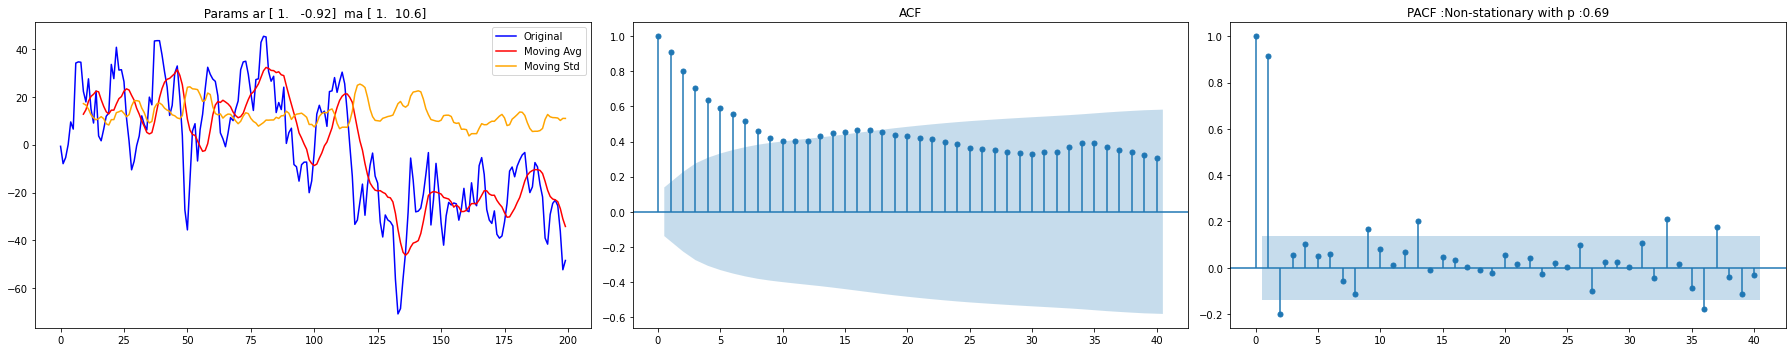

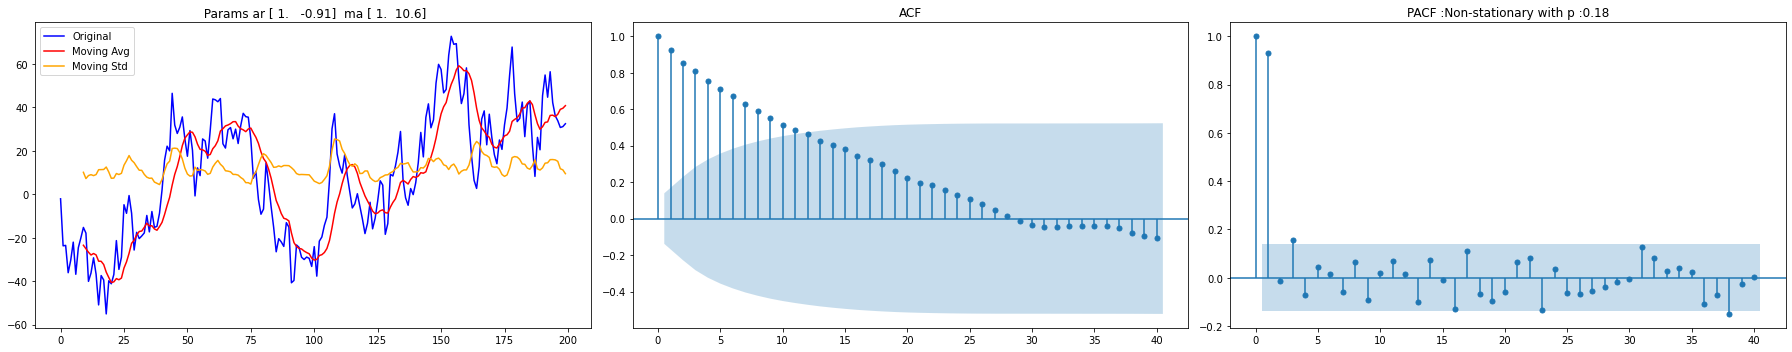

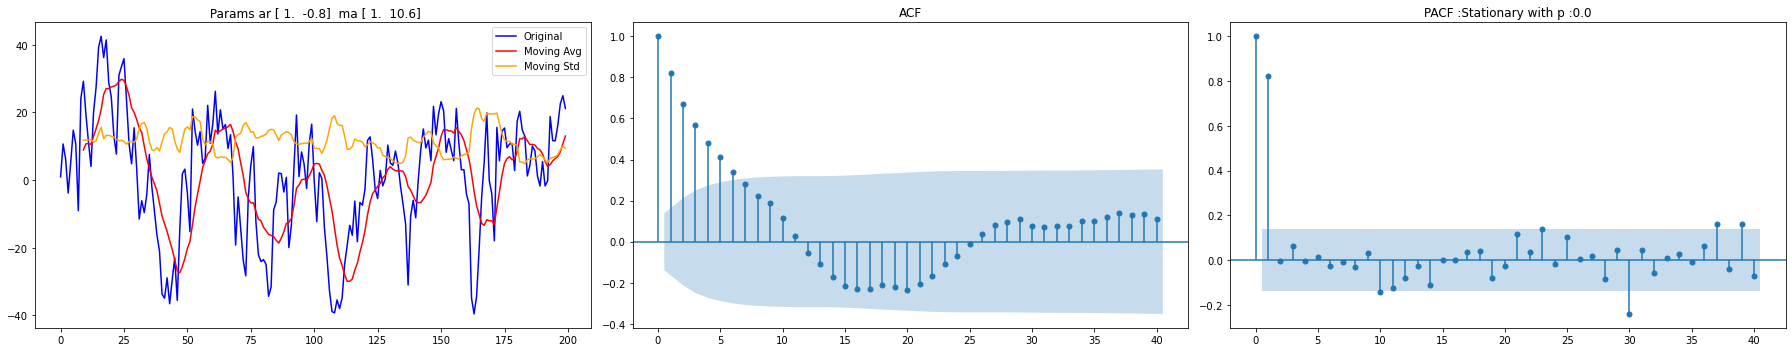

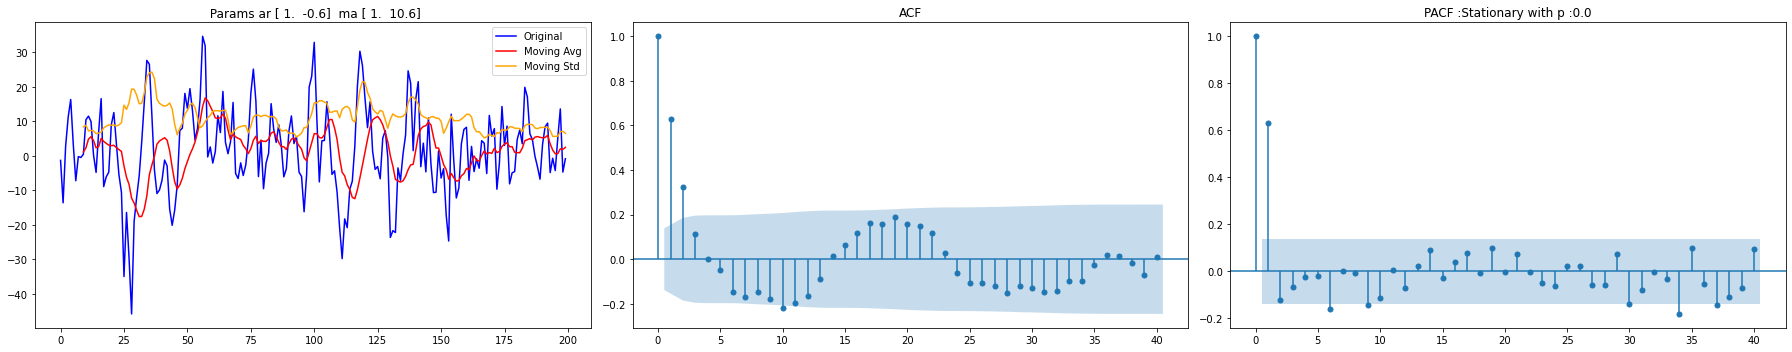

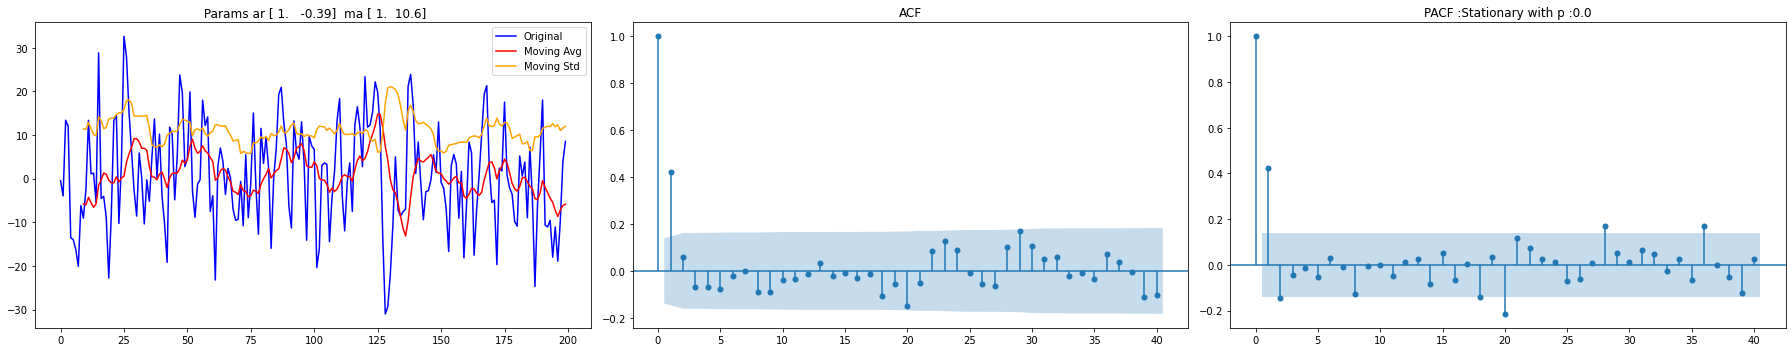

In [5]:
#Effect or AR term, 0.99 mean high correlation so series is Non-Stationary
#Other values are staionary
#0.99 and 0.92 non-stationary
#0.91 stationary  =
#0.9 x 0.9 = 0.81  -> 0.81 x 0.9 = 0.72 -> 0.72 x 0.9 = 0.63
_ = gen_arma_data( ar1 = np.array([1,-0.99]) ,ma1 = np.array([1,10.6]) ,lags=40)
_ = gen_arma_data( ar1 = np.array([1,-0.92]) ,ma1 = np.array([1,10.6]) ,lags=40)
_ = gen_arma_data( ar1 = np.array([1,-0.91]) ,ma1 = np.array([1,10.6]) ,lags=40)
_ = gen_arma_data( ar1 = np.array([1,-0.80]) ,ma1 = np.array([1,10.6]) ,lags=40)
_ = gen_arma_data( ar1 = np.array([1,-0.60]) ,ma1 = np.array([1,10.6]) ,lags=40)
_ = gen_arma_data( ar1 = np.array([1,-0.39]) ,ma1 = np.array([1,10.6]) ,lags=40)

In [76]:
def get_series(ratio):
    current  = 1
    serie = []
    for i in range(10):
        current = ratio * current
        serie.append( np.round(current  ,2)  )
    return serie    
    
print("Divergence 0.99 :",get_series(0.99) )
print("Divergence 0.95 :",get_series(0.95) )
print("Divergence 0.92 :",get_series(0.92) )
print("Divergence 0.91 :",get_series(0.91) )
print("Divergence 0.89 :",get_series(0.89) )

Divergence 0.99 : [0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9]
Divergence 0.95 : [0.95, 0.9, 0.86, 0.81, 0.77, 0.74, 0.7, 0.66, 0.63, 0.6]
Divergence 0.92 : [0.92, 0.85, 0.78, 0.72, 0.66, 0.61, 0.56, 0.51, 0.47, 0.43]
Divergence 0.91 : [0.91, 0.83, 0.75, 0.69, 0.62, 0.57, 0.52, 0.47, 0.43, 0.39]
Divergence 0.89 : [0.89, 0.79, 0.7, 0.63, 0.56, 0.5, 0.44, 0.39, 0.35, 0.31]


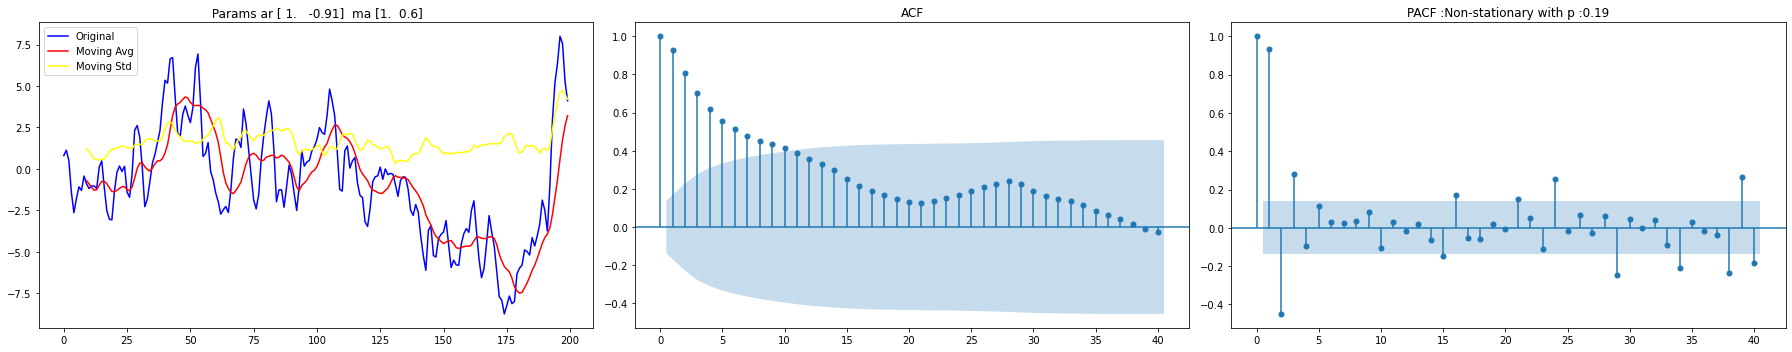

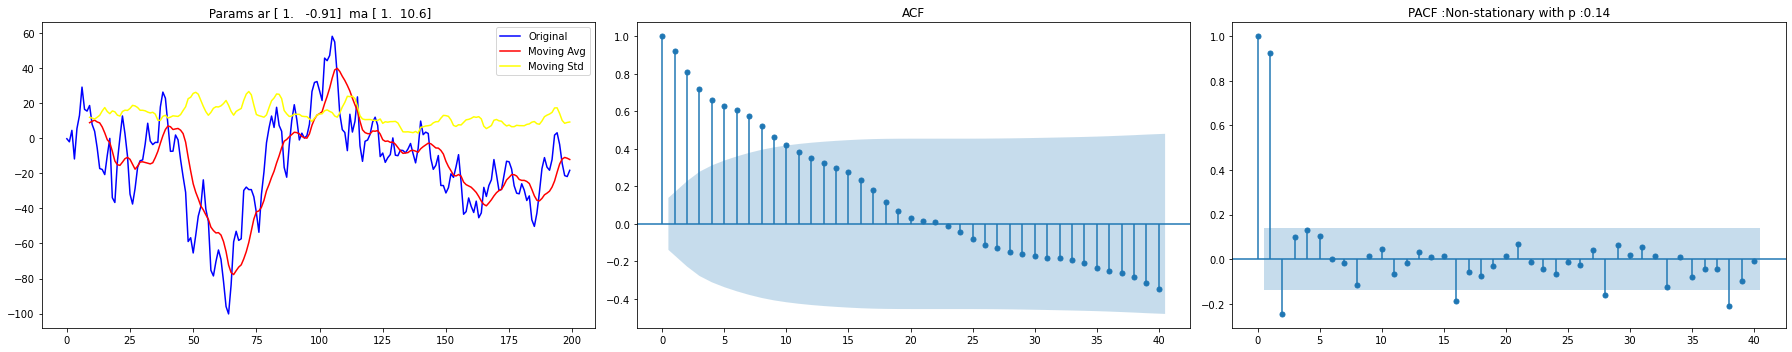

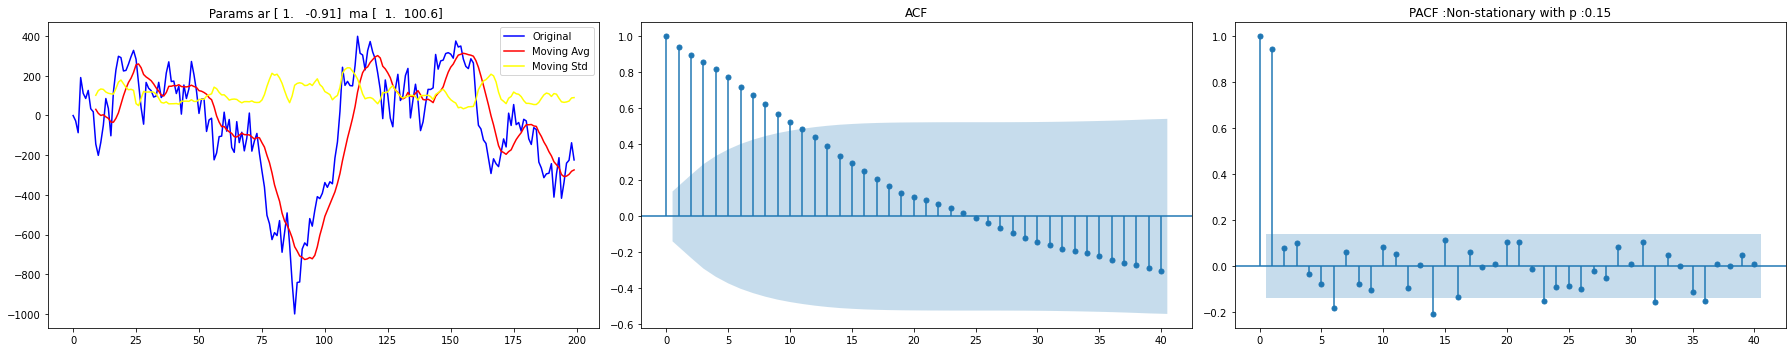

In [52]:
#AR is 0.99 strong correlation only change ma, it seems to make range wider
#also 1 more effect is since range is wider,ACF goes to zero quicker
_ = gen_arma_data( ar1 = np.array([1,-0.91]) ,ma1 = np.array([1,0.6]) ,lags=40)
_ = gen_arma_data( ar1 = np.array([1,-0.91]) ,ma1 = np.array([1,10.6]) ,lags=40)
_ = gen_arma_data( ar1 = np.array([1,-0.91]) ,ma1 = np.array([1,100.6]) ,lags=40)

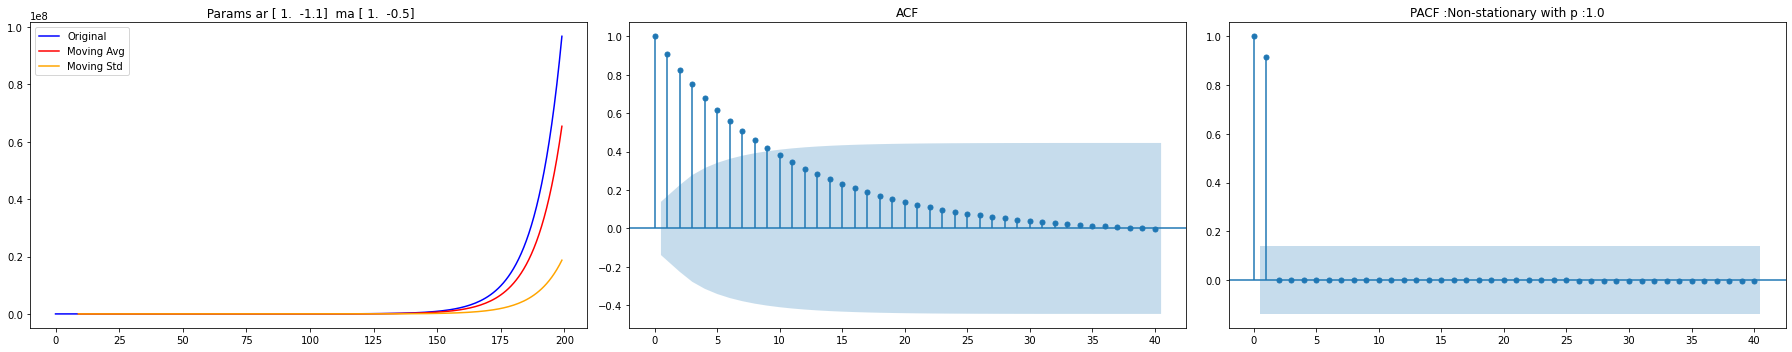

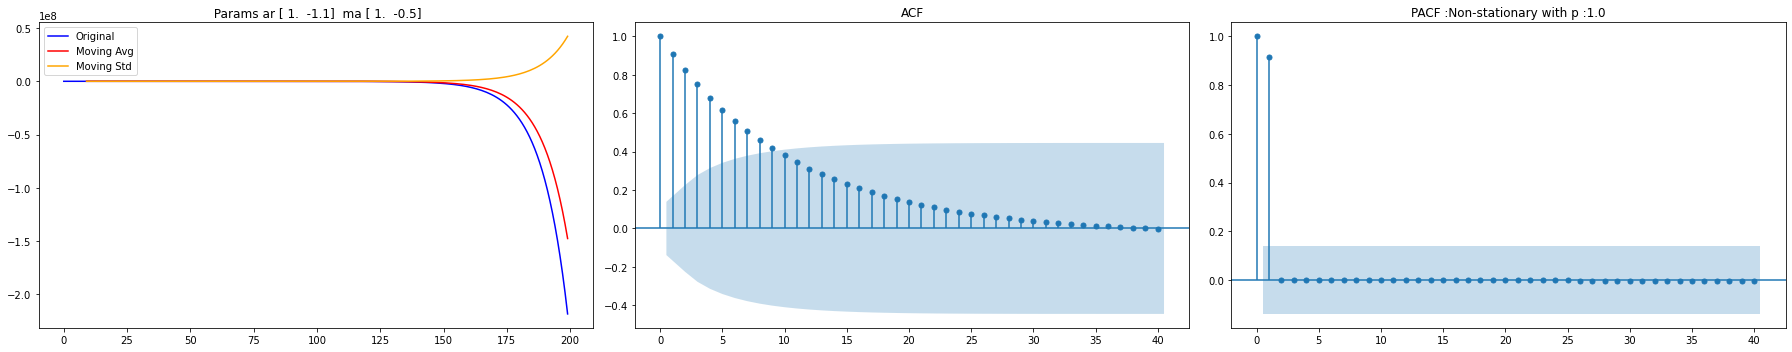

In [84]:
#shows logaritmic increase or decrease according to initial values
data = gen_arma_data( ar1 = np.array([1,-1.1]) ,ma1 = np.array([1,-0.5]),lags=40)
data = gen_arma_data( ar1 = np.array([1,-1.1]) ,ma1 = np.array([1,-0.5]),lags=40)


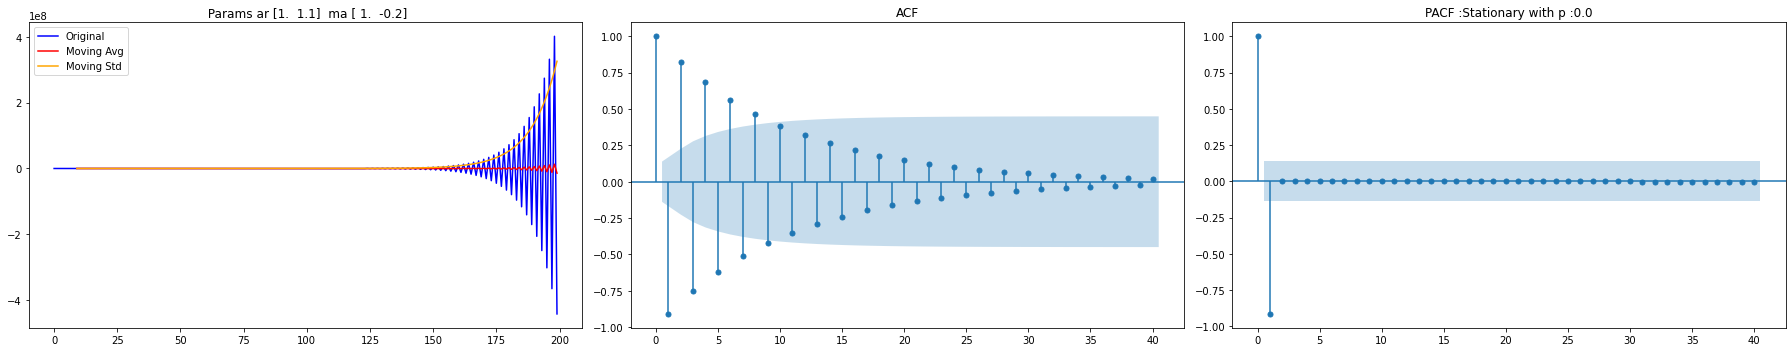

In [83]:

#shows logaritmic oscilation
data = gen_arma_data( ar1 = np.array([1,1.1]) ,ma1 = np.array([1,-0.2]),lags=40)

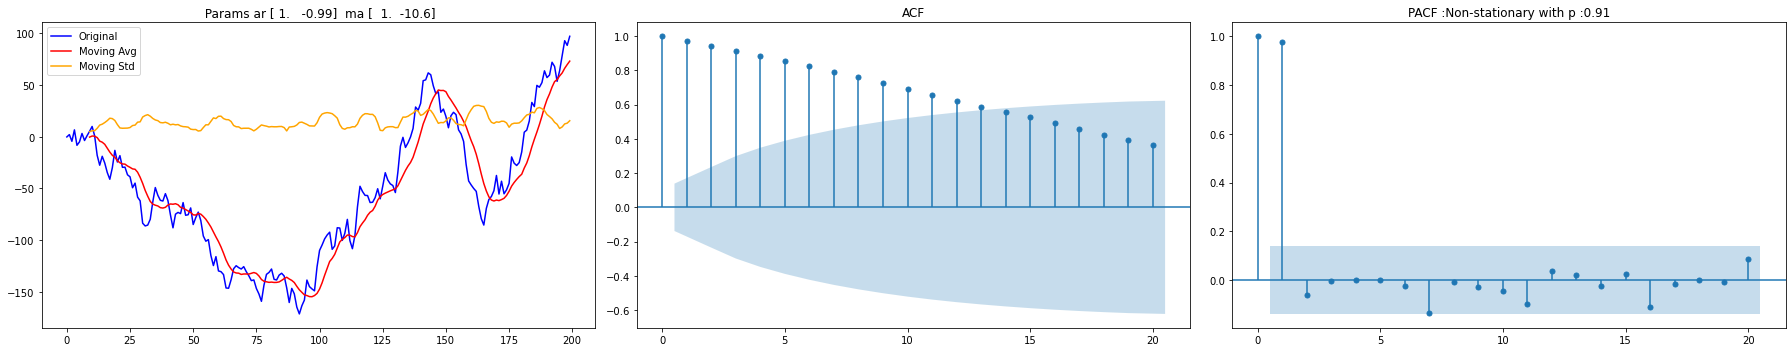

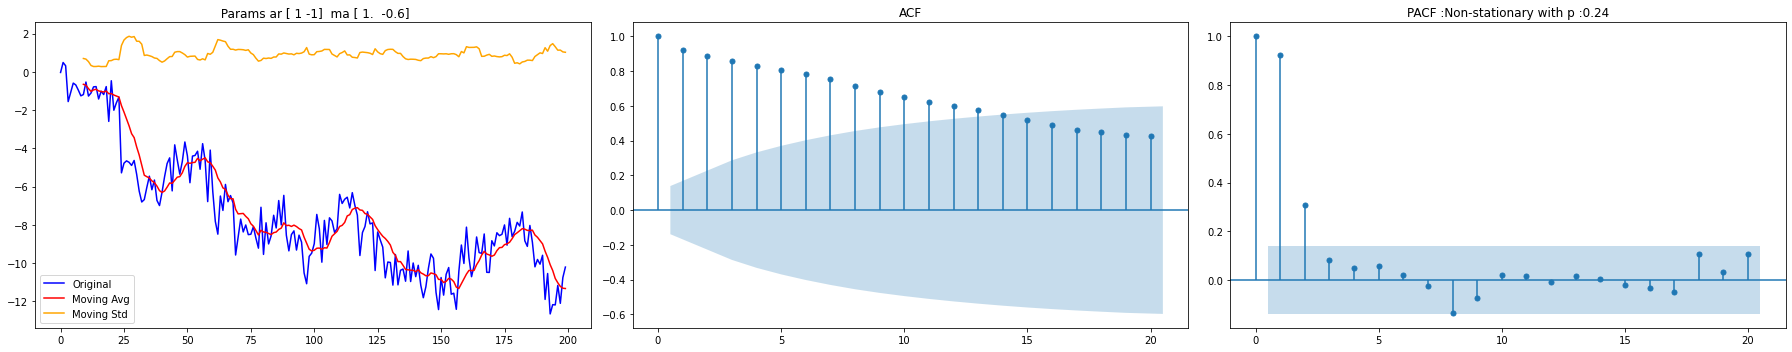

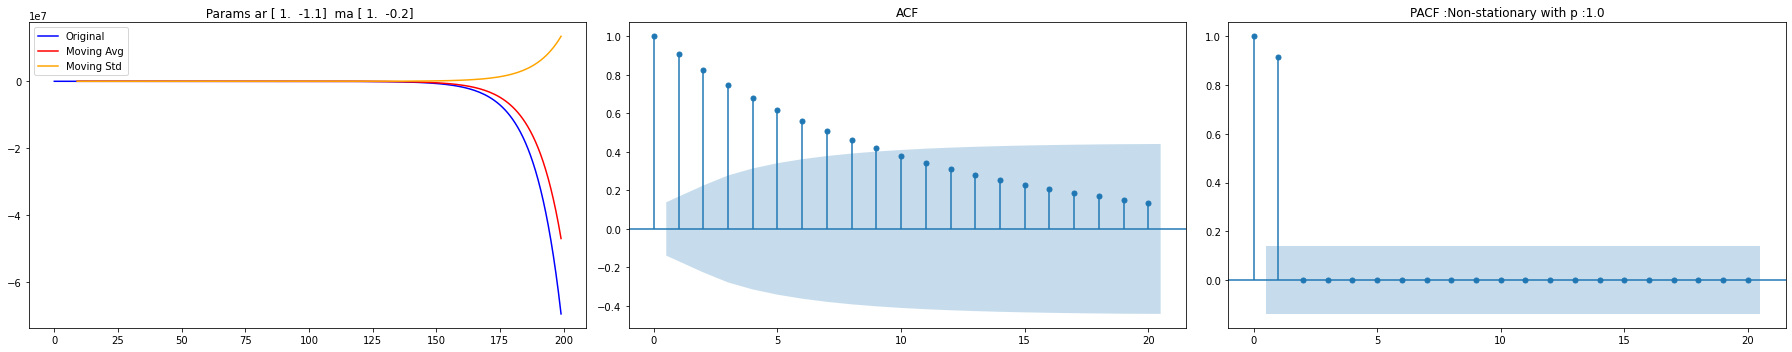

In [88]:

#How strong relations seem  -1.1 makes e7 very high rocketing
#as correlation gets strong ,there is a constant trend of exploding
data = gen_arma_data( ar1 = np.array([1,-0.99]) ,ma1 = np.array([1,-10.6]) ,lags=20)
data = gen_arma_data( ar1 = np.array([1,-1]) ,ma1 = np.array([1,-0.6]) ,lags=20)
data = gen_arma_data( ar1 = np.array([1,-1.1]) ,ma1 = np.array([1,-0.2]) ,lags=20) 


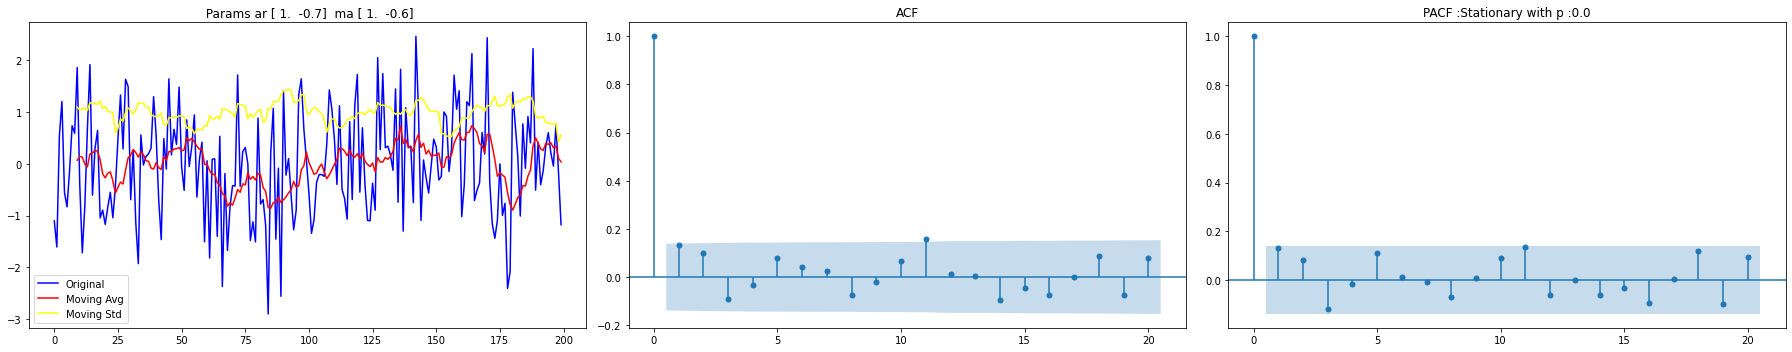

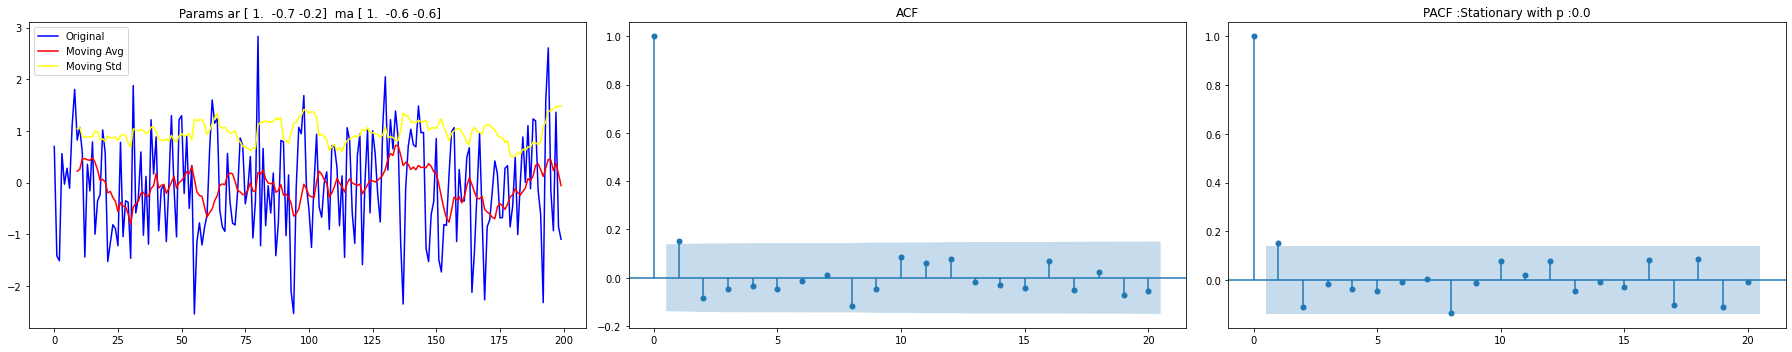

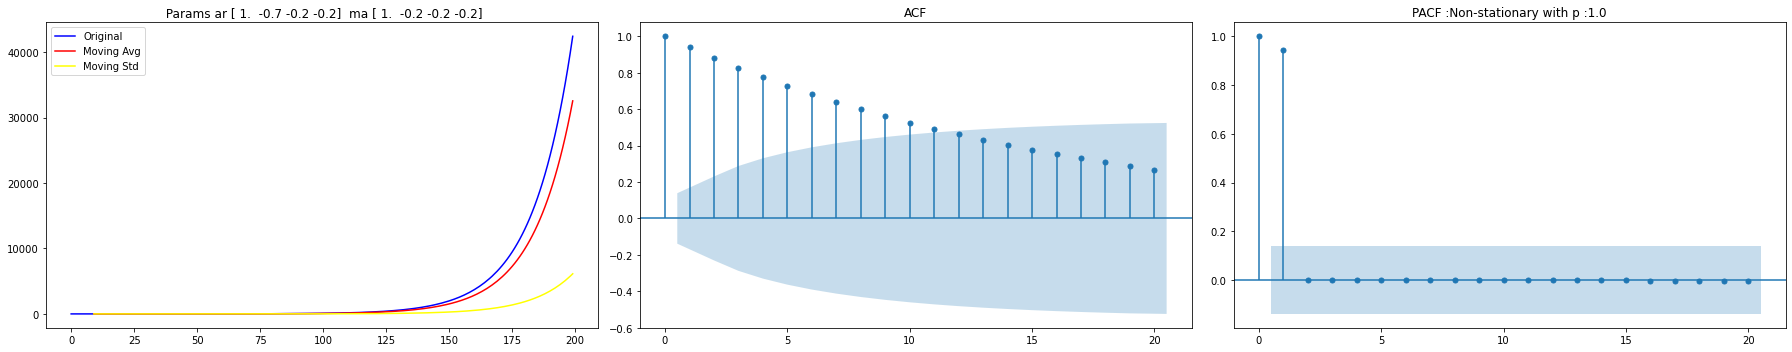

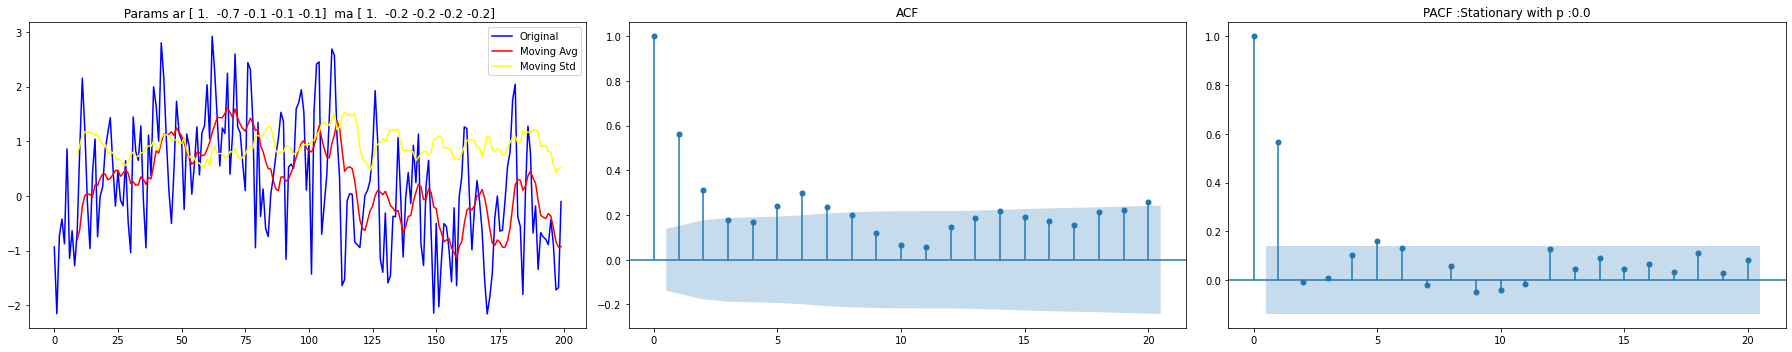

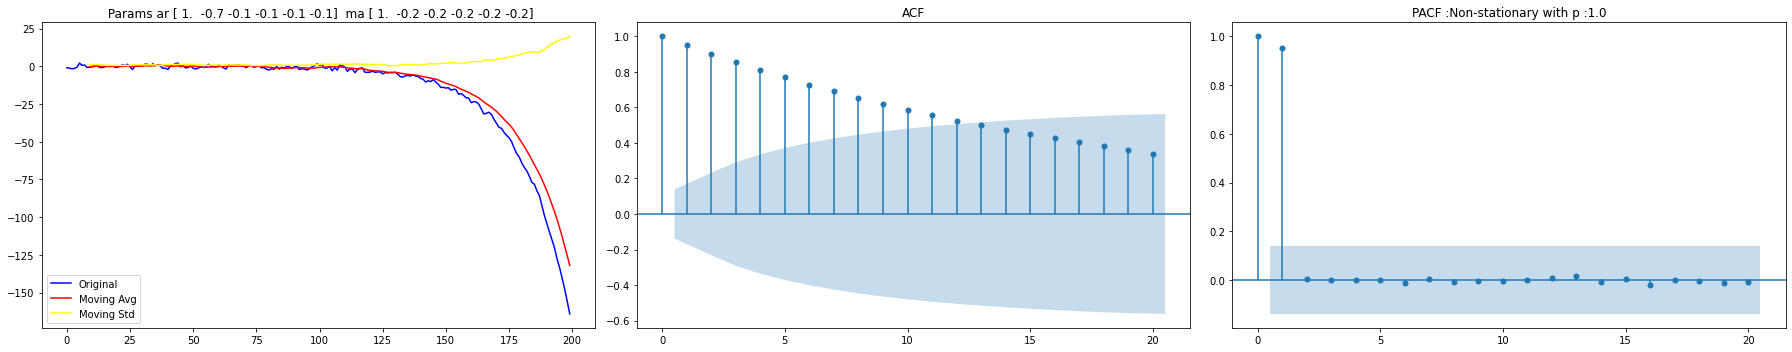

In [9]:
#How to have rocketing with multi lag if cumulative of lags make >1 graphs are rocketing
data = gen_arma_data( ar1 = np.array([1,-0.7]) ,ma1 = np.array([1,-0.6]) ,lags=20)
data = gen_arma_data( ar1 = np.array([1,-0.7,-0.2]) ,ma1 = np.array([1,-0.6,-0.6]) ,lags=20)
data = gen_arma_data( ar1 = np.array([1,-0.7,-0.2,-0.2]) ,ma1 = np.array([1,-0.2,-0.2,-0.2]) ,lags=20)
data = gen_arma_data( ar1 = np.array([1,-0.7,-0.1,-0.1,-0.1]) ,ma1 = np.array([1,-0.2,-0.2,-0.2,-0.2]) ,lags=20)
data = gen_arma_data( ar1 = np.array([1,-0.7,-0.1,-0.1,-0.1,-0.1]) ,ma1 = np.array([1,-0.2,-0.2,-0.2,-0.2,-0.2]) ,lags=20)

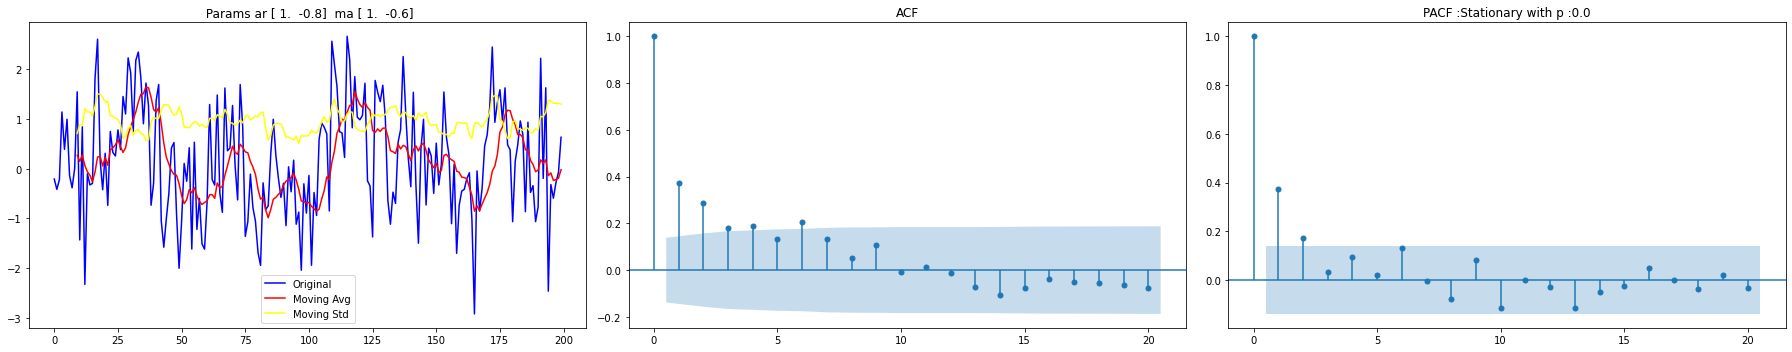

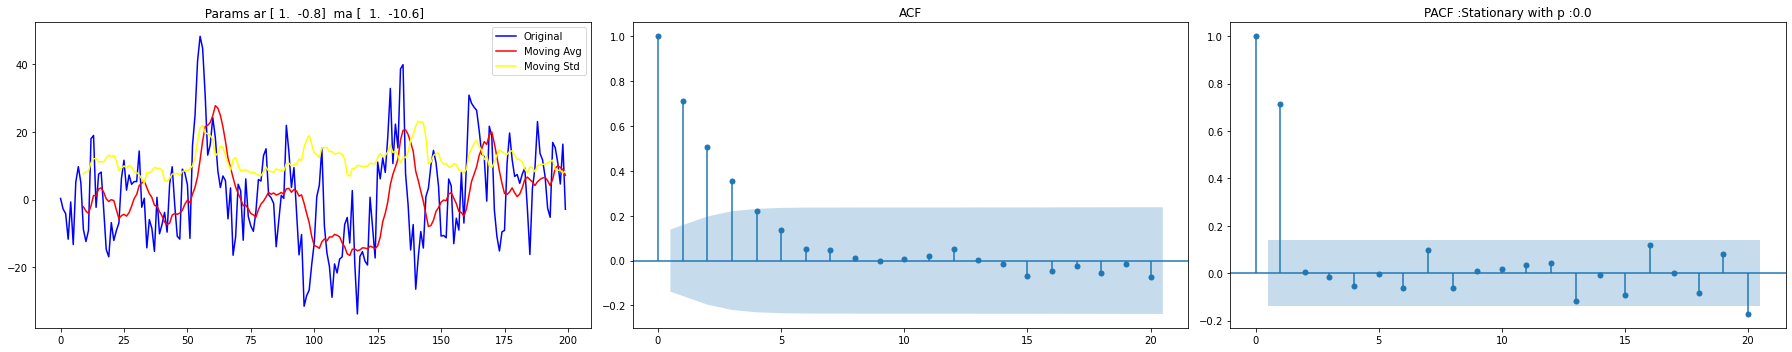

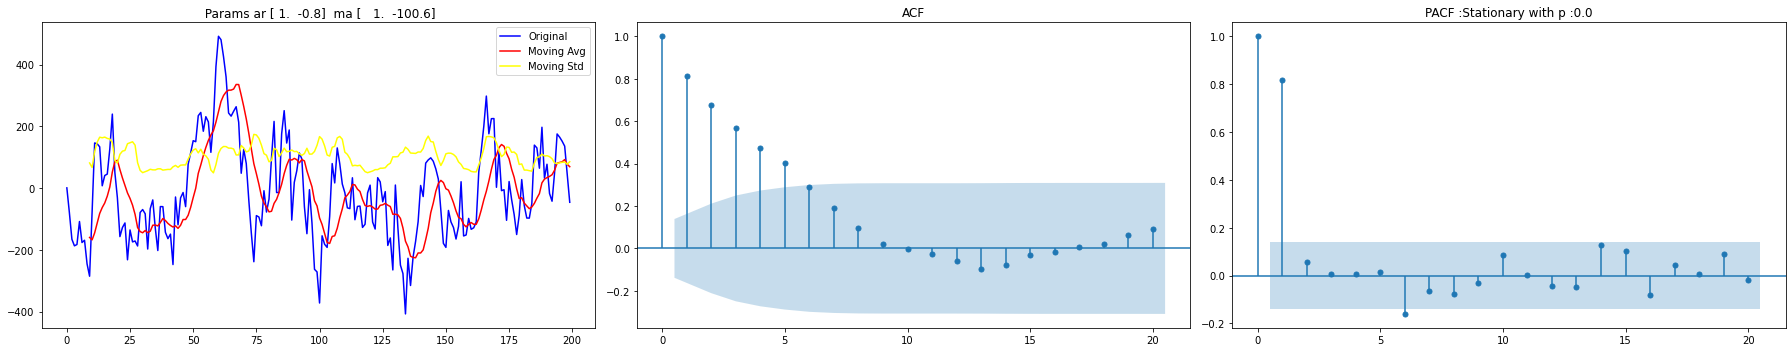

In [10]:
#Changing ma does not change stationarity  Change of MA changes range of values stationarity is not effected
data = gen_arma_data( ar1 = np.array([1,-0.8]) ,ma1 = np.array([1,-0.6]) ,lags=20)
data = gen_arma_data( ar1 = np.array([1,-0.8]) ,ma1 = np.array([1,-10.6]) ,lags=20)
data = gen_arma_data( ar1 = np.array([1,-0.8]) ,ma1 = np.array([1,-100.6]),lags=20)

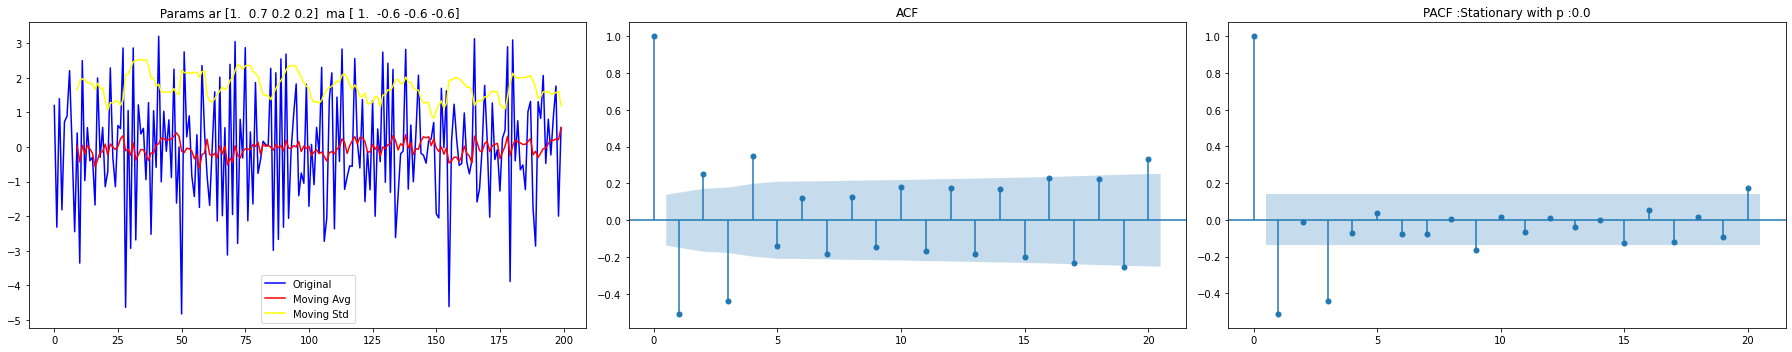

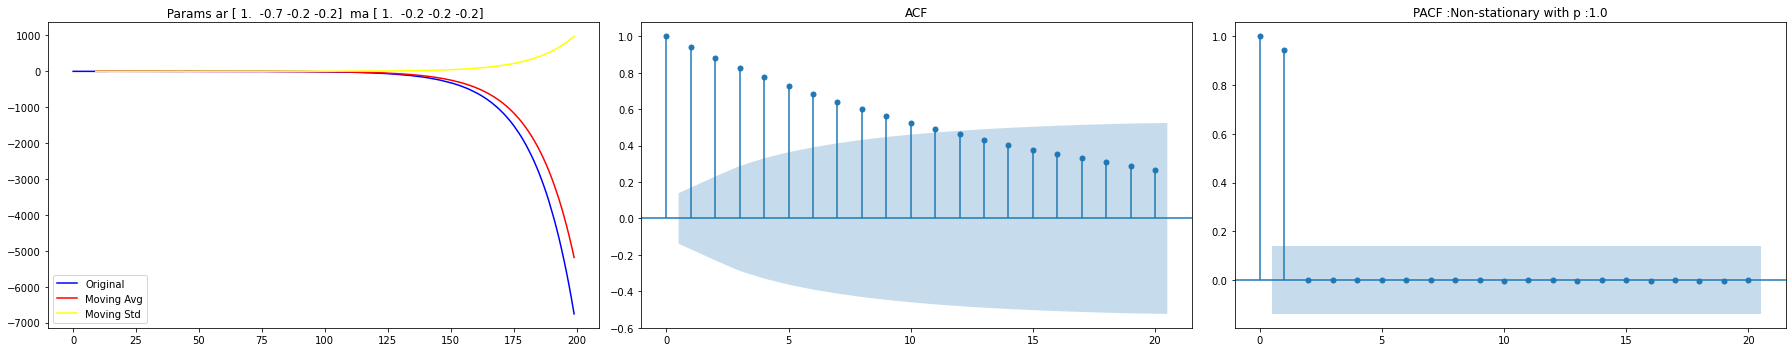

In [11]:
#If AR term positive because of calculation graph oscilates
data = gen_arma_data( ar1 = np.array([1,0.7,0.2,0.2]) ,ma1 = np.array([1,-0.6,-0.6,-0.6]) ,lags=20)

data = gen_arma_data( ar1 = np.array([1,-0.7,-0.2,-0.2]) ,ma1 = np.array([1,-0.2,-0.2,-0.2]) ,lags=20)

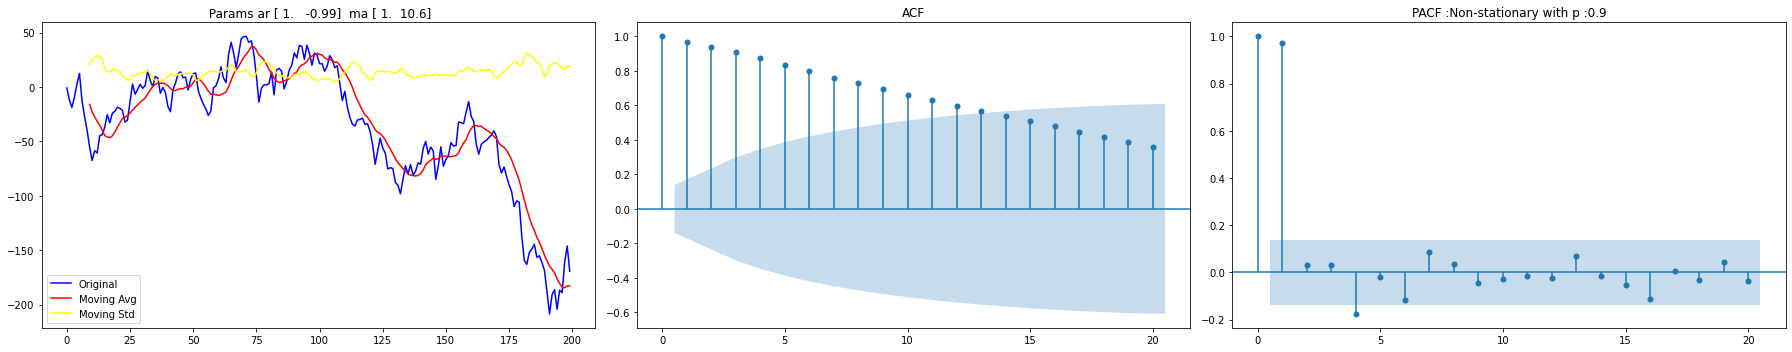

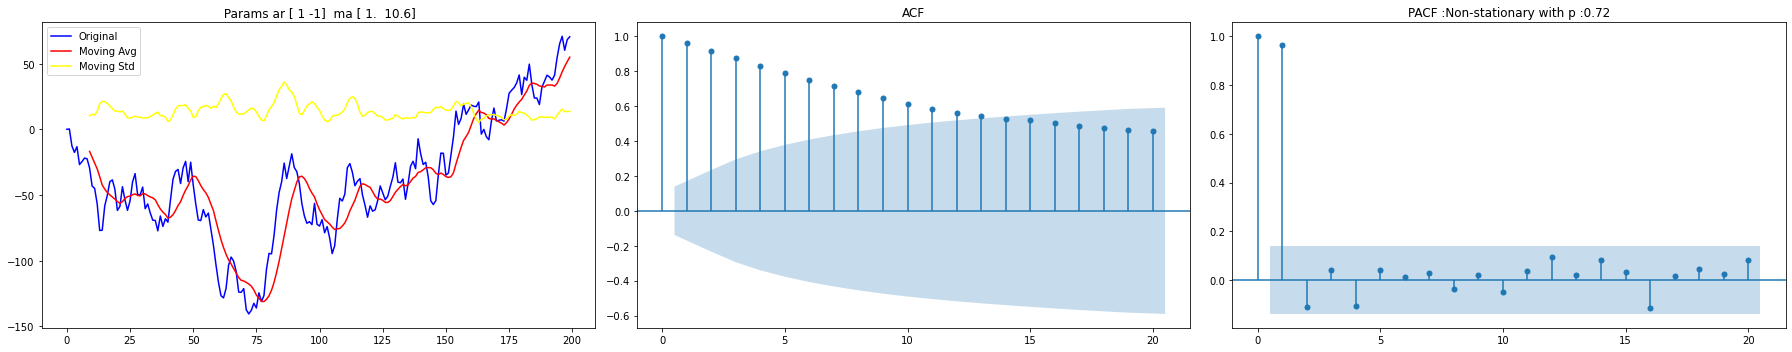

In [12]:
#0.99 and 1 are non-stationary both but p value is very different 
data = gen_arma_data( ar1 = np.array([1,-0.99]) ,ma1 = np.array([1,10.6]) ,lags=20)
data = gen_arma_data( ar1 = np.array([1,-1]) ,ma1 = np.array([1,10.6]) ,lags=20)

C:\Users\mcelikkaya\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


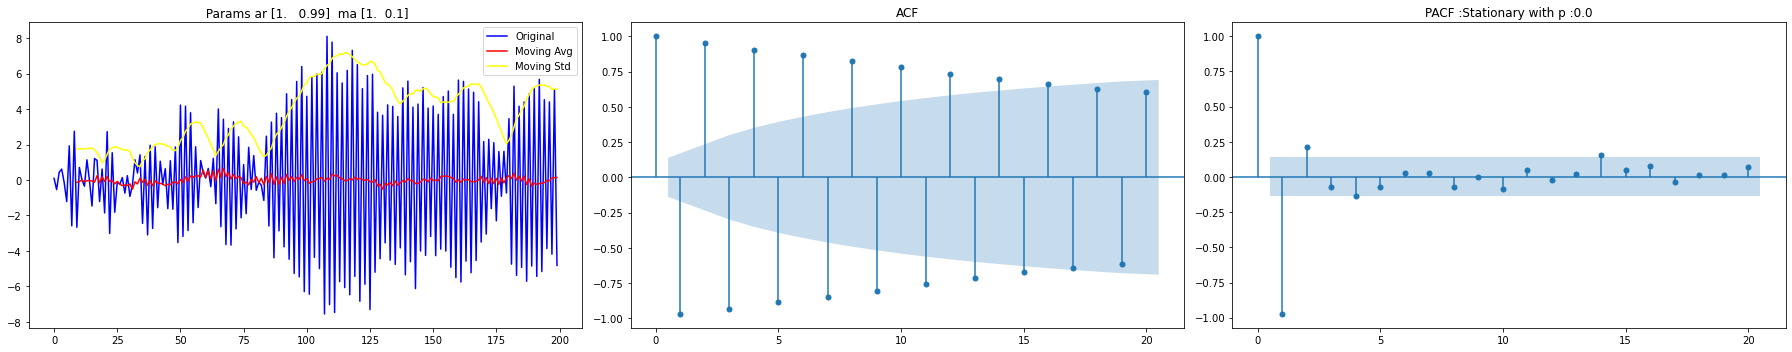

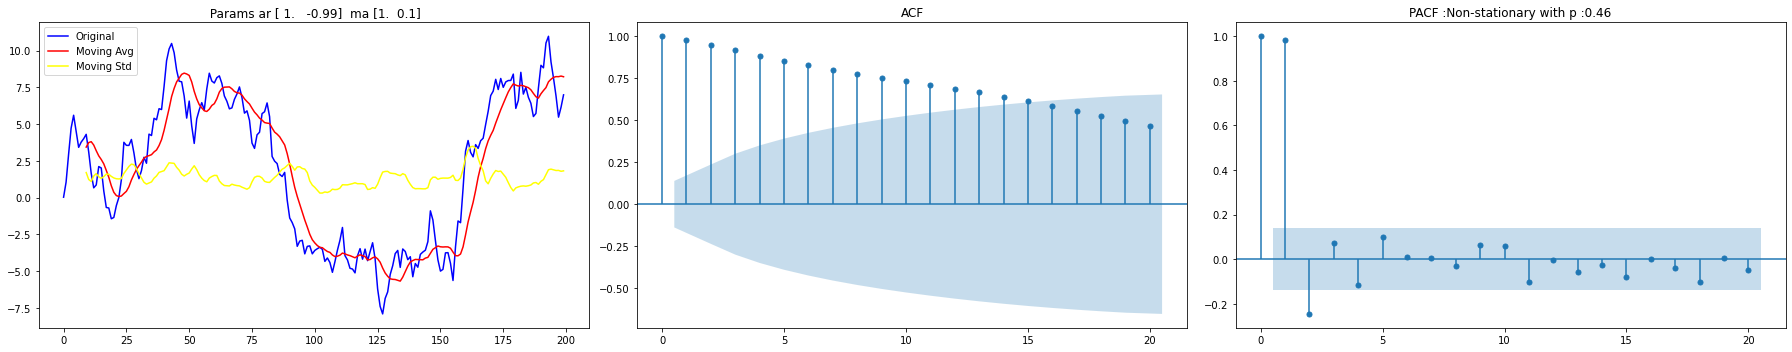

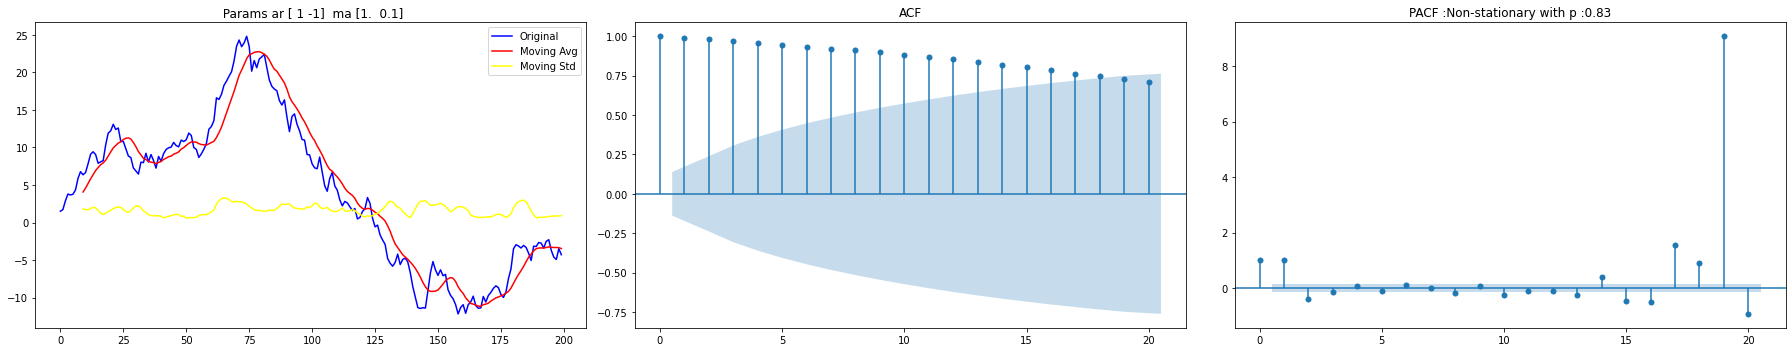

In [13]:
data = gen_arma_data( ar1 = np.array([1,0.99]) ,ma1 = np.array([1,0.1]) ,lags=20)
data = gen_arma_data( ar1 = np.array([1,-0.99]) ,ma1 = np.array([1,0.1]) ,lags=20)
data = gen_arma_data( ar1 = np.array([1,-1]) ,ma1 = np.array([1,0.1]) ,lags=20)

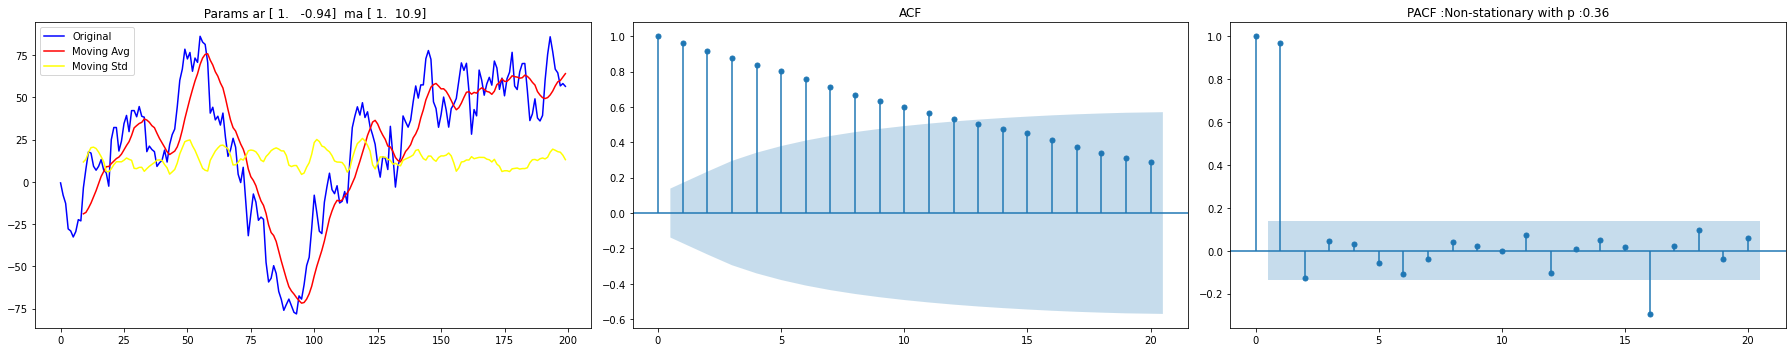

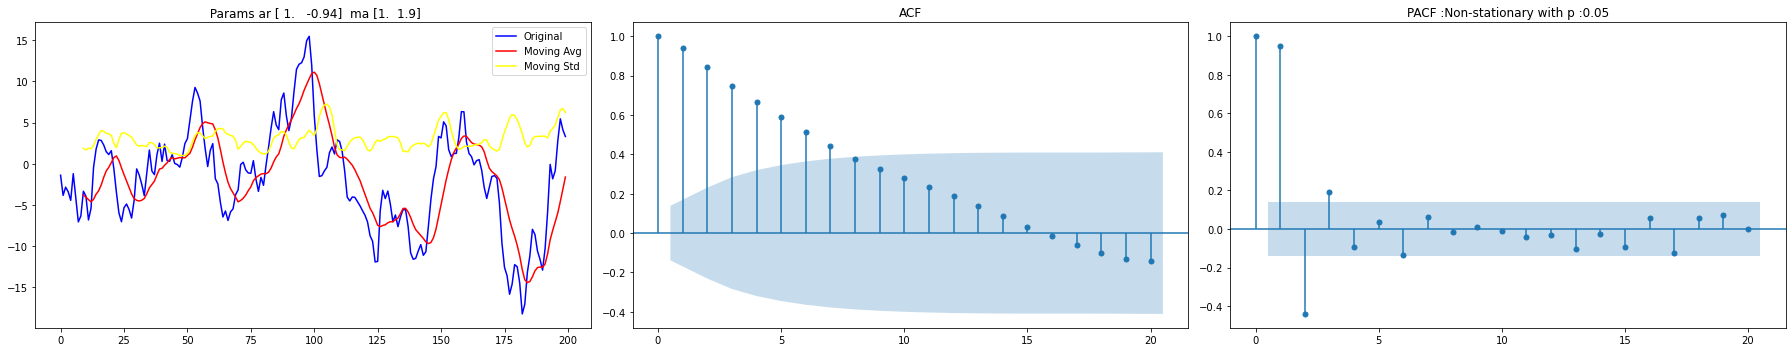

In [14]:
data = gen_arma_data( ar1 = np.array([1,-0.94]) ,ma1 = np.array([1,10.9]) ,lags=20)
data = gen_arma_data( ar1 = np.array([1,-0.94]) ,ma1 = np.array([1,1.9]) ,lags=20)

ϕ0⋅yt=θ0ϵt+θ1ϵt−1+…+θqϵt−q−ϕ1yt−1−…−ϕpyt−p,


y4=ϵ4+(−0.3)⋅ϵ3−y3⋅(−0.5)=0.5⋅y3−0.3⋅ϵ3+ϵ4.


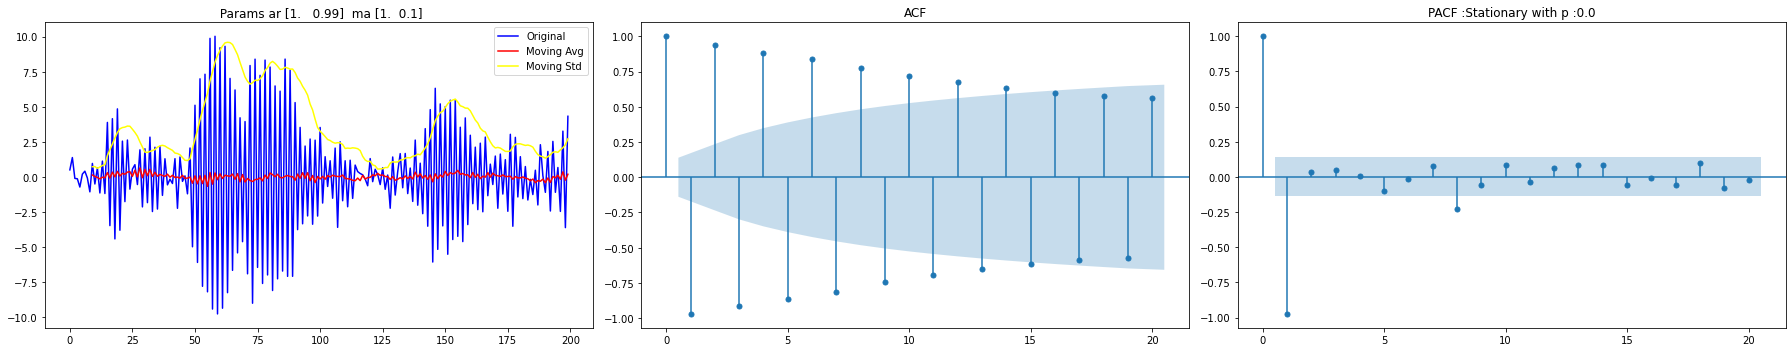

In [15]:
data = gen_arma_data( ar1 = np.array([1,0.99]) ,ma1 = np.array([1,0.1]) ,lags=20)
data = gen_arma_data( ar1 = np.array([1,-0.99]) ,ma1 = np.array([1,0.1]) ,lags=20)

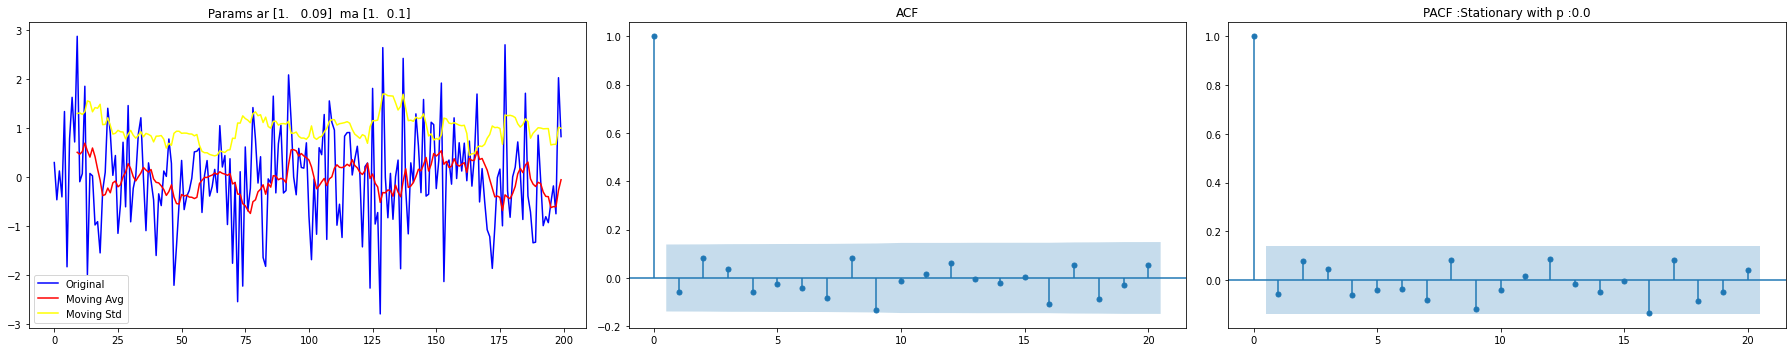

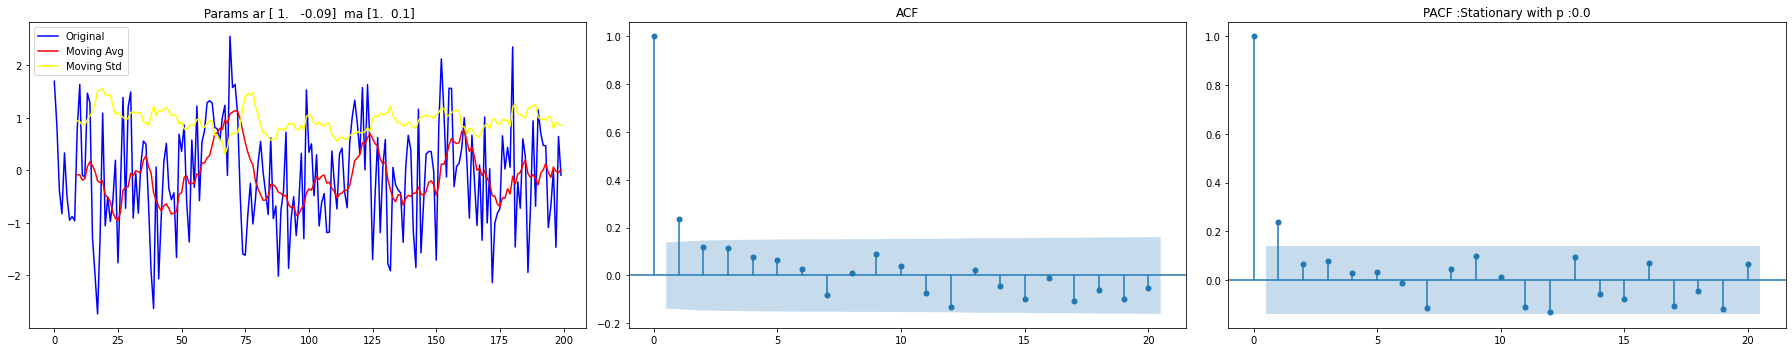

In [16]:
#Positive or negative very weak correlation, both stationary
data = gen_arma_data( ar1 = np.array([1,0.09]) ,ma1 = np.array([1,0.1]) ,lags=20)
data = gen_arma_data( ar1 = np.array([1,-0.09]) ,ma1 = np.array([1,0.1]) ,lags=20)

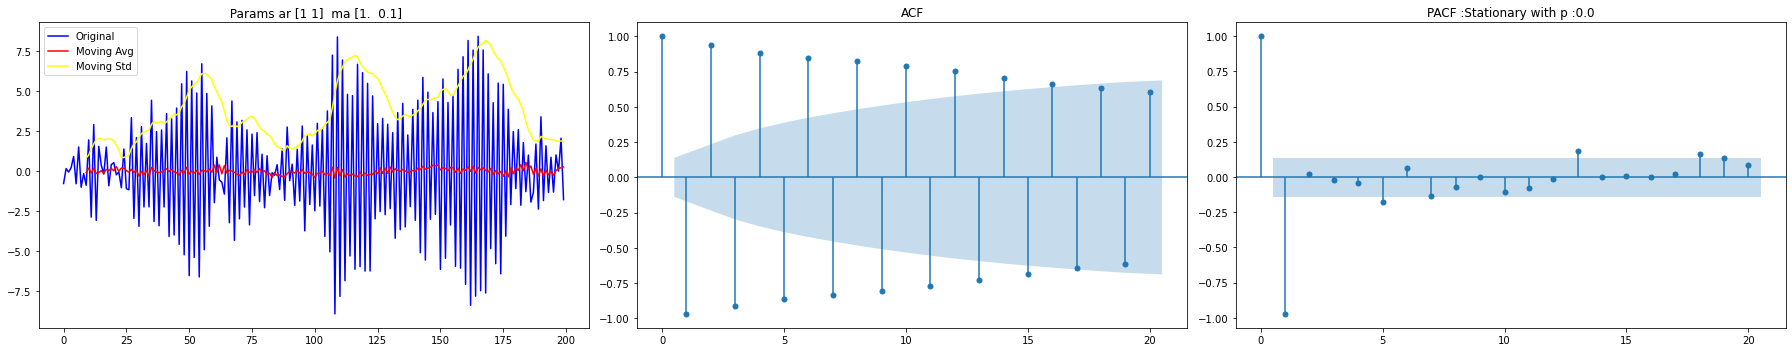

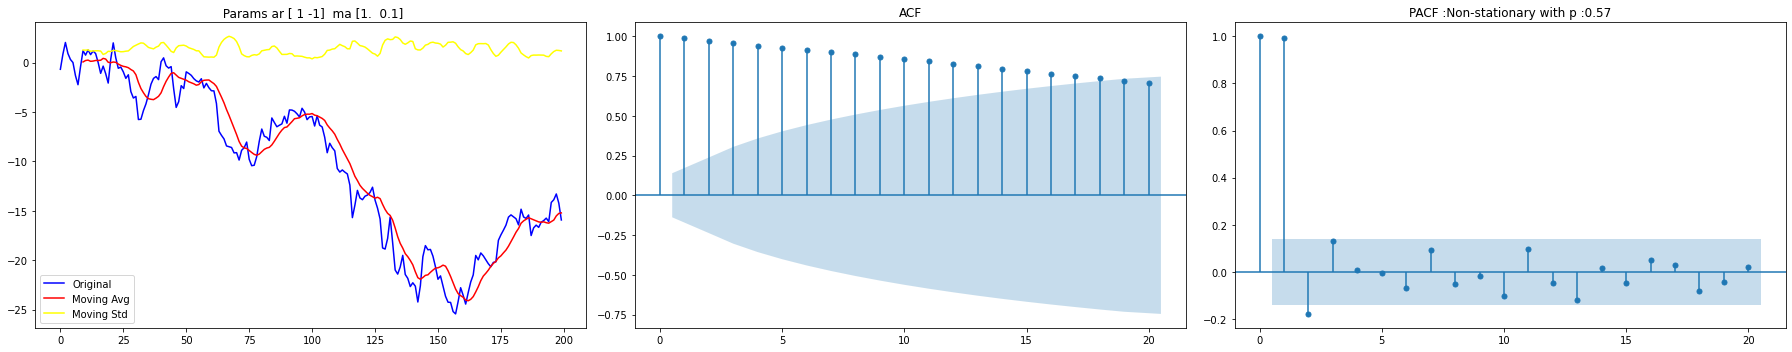

In [17]:
#Y(t) = -ar[1] * -Y(t-1)
# -1 means perfect relation with previous value 
# 1 means opposite relation with lag so u can see it is oscilating,also u can see oscilations are increasing 
data = gen_arma_data( ar1 = np.array([1,1]) ,ma1 = np.array([1,0.1]) ,lags=20)
data = gen_arma_data( ar1 = np.array([1,-1]) ,ma1 = np.array([1,0.1]) ,lags=20)

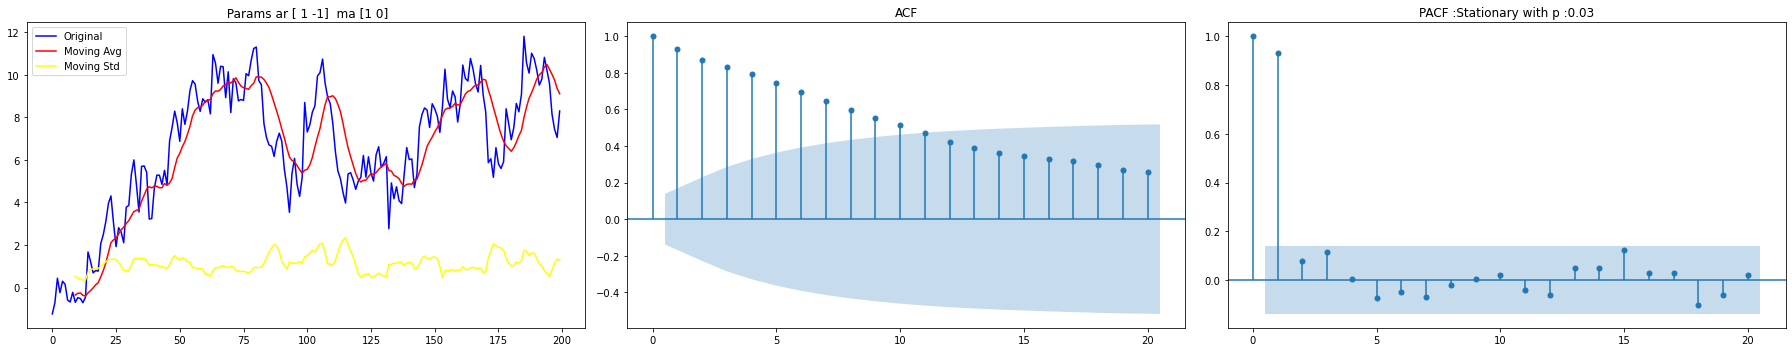

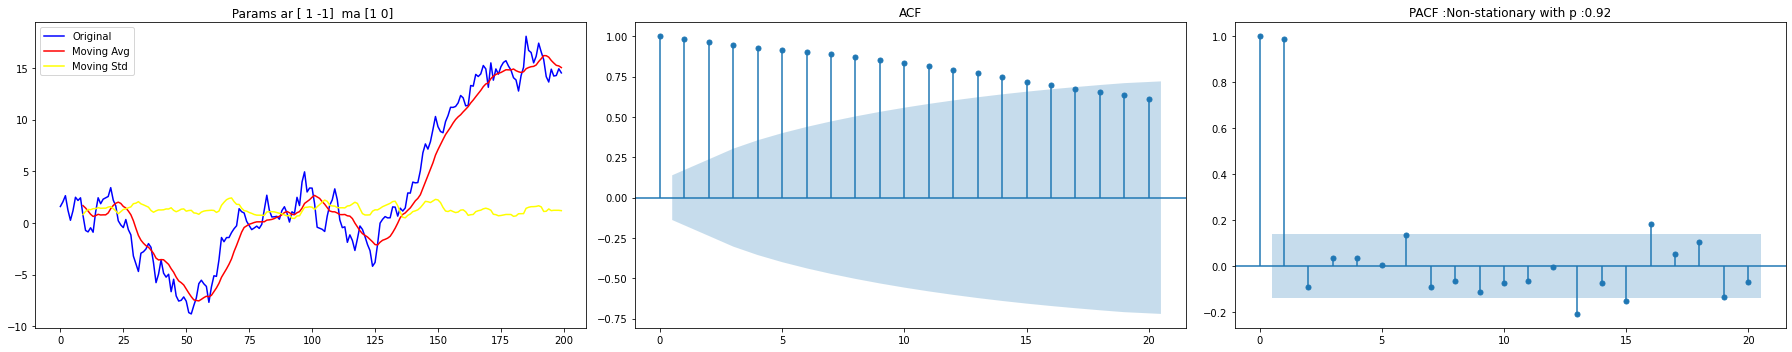

In [18]:
#Even I say -1 is perfect relation it will not mean we cannot guess shape of final graph
data = gen_arma_data( ar1 = np.array([1,-1]) ,ma1 = np.array([1,0]) ,lags=20)
data = gen_arma_data( ar1 = np.array([1,-1]) ,ma1 = np.array([1,0]) ,lags=20)
data = gen_arma_data( ar1 = np.array([1,-1]) ,ma1 = np.array([1,0]) ,lags=20)

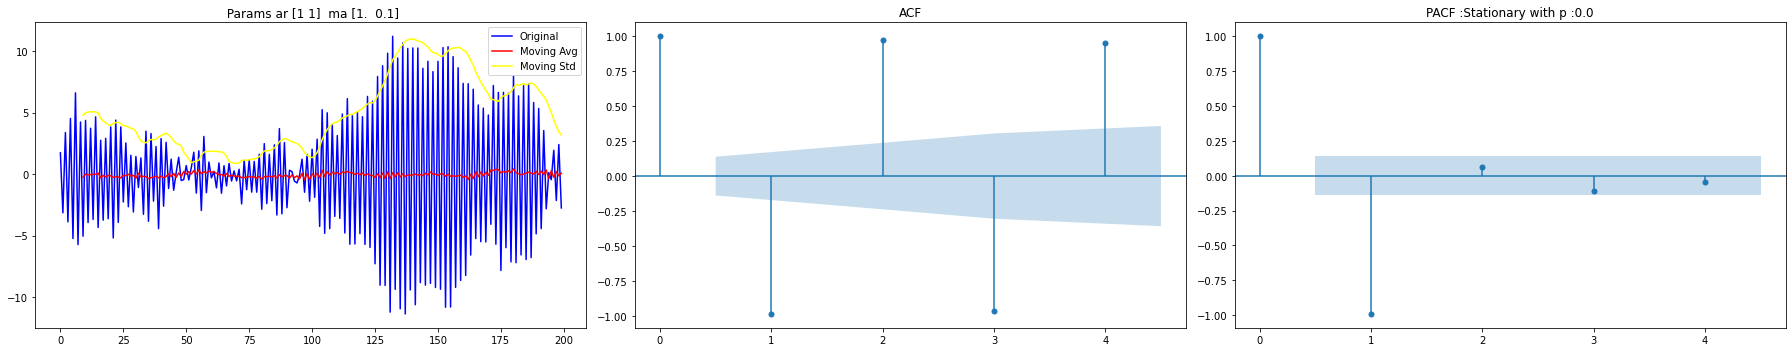

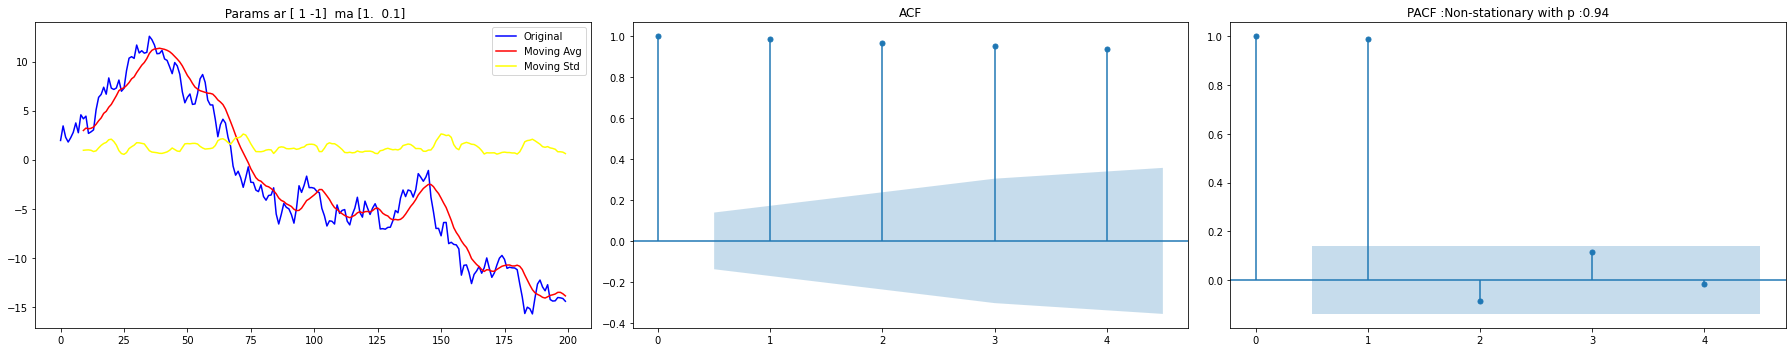

In [19]:
data = gen_arma_data( ar1 = np.array([1,1]) ,ma1 = np.array([1,0.1]) ,lags=4)
data = gen_arma_data( ar1 = np.array([1,-1]) ,ma1 = np.array([1,0.1]) ,lags=4)

C:\Users\mcelikkaya\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\mcelikkaya\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


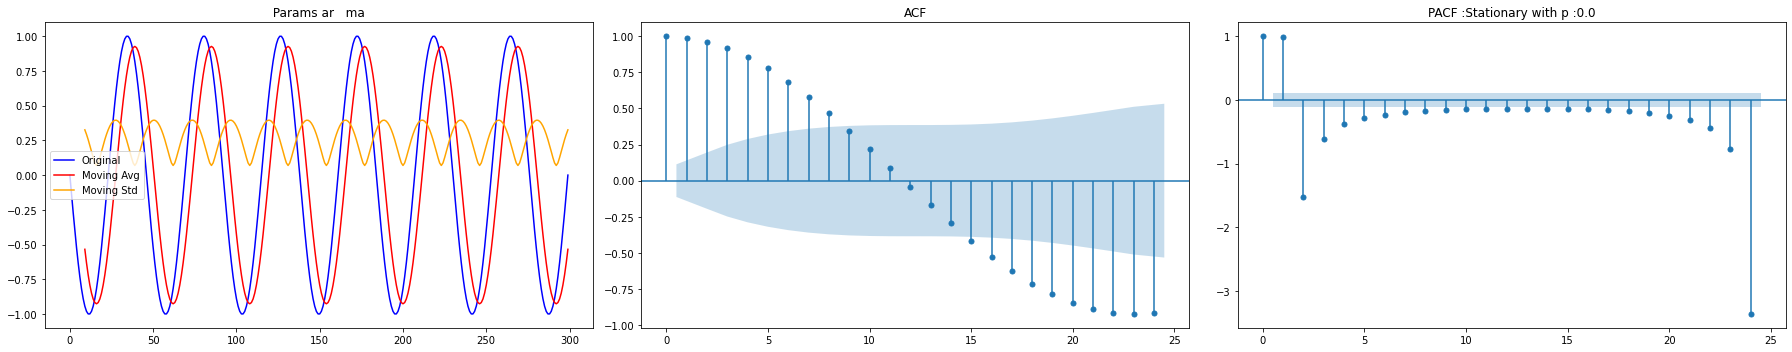

In [6]:
sin_data1 = np.sin( np.linspace(-np.pi, 12 * np.pi, 300) )
sin_data2 = np.sin( np.linspace(-np.pi* -2 , 12 * np.pi, 300) )

sin_data3 = np.sin( np.linspace(-np.pi, 12 * np.pi, 300) ) * 200
sin_data4 = np.sin( np.linspace(-np.pi* -2 , 12 * np.pi, 300) ) * 200
max_relation = 0.4


_ = plot_summary( ar1 = "" ,ma1 = "" ,lags=24, orig_data = sin_data1 )
_ = plot_summary( ar1 = "" ,ma1 = "" ,lags=24, orig_data = sin_data2 )
#_ = plot_summary( ar1 = "" ,ma1 = "" ,lags=24, orig_data = sin_data3 )
#_ = plot_summary( ar1 = "" ,ma1 = "" ,lags=24, orig_data = sin_data4 )

C:\Users\mcelikkaya\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\mcelikkaya\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


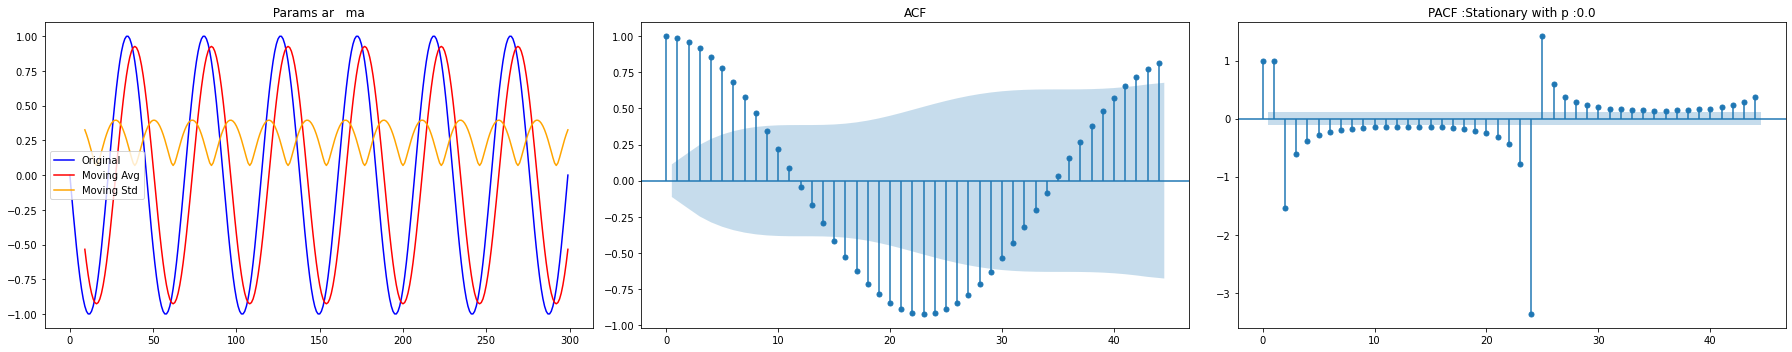

In [7]:
_ = plot_summary( ar1 = "" ,ma1 = "" ,lags=44, orig_data = sin_data1 )
_ = plot_summary( ar1 = "" ,ma1 = "" ,lags=44, orig_data = sin_data2 )

C:\Users\mcelikkaya\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


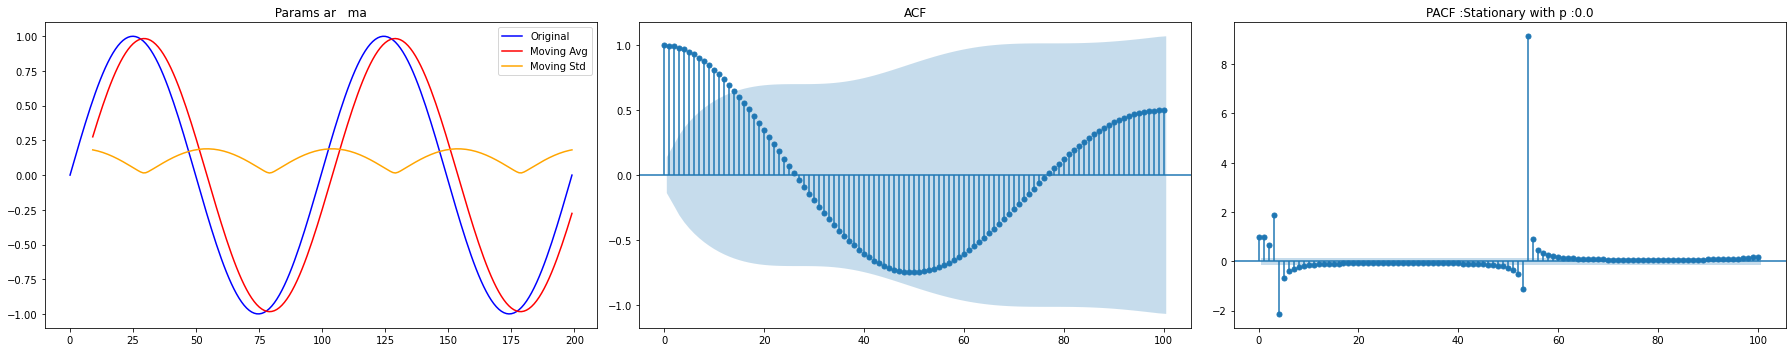

In [30]:
sin_data1 = np.sin( np.linspace(-np.pi*-2, 6* np.pi, 200) )
_ = plot_summary( ar1 = "" ,ma1 = "" ,lags=100, orig_data = sin_data1 )


In [16]:
sin_data1 = np.sin( np.linspace(-np.pi, 12 * np.pi, 200) )
sin_data2 = np.sin( np.linspace(-np.pi* -2 , 12 * np.pi, 200) )
_ = plot_summary( ar1 = "" ,ma1 = "" ,lags=30, orig_data = sin_data1 )
_ = plot_summary( ar1 = "" ,ma1 = "" ,lags=30, orig_data = sin_data2 )


C:\Users\mcelikkaya\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\mcelikkaya\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


C:\Users\mcelikkaya\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\mcelikkaya\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\mcelikkaya\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\mcelikkaya\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


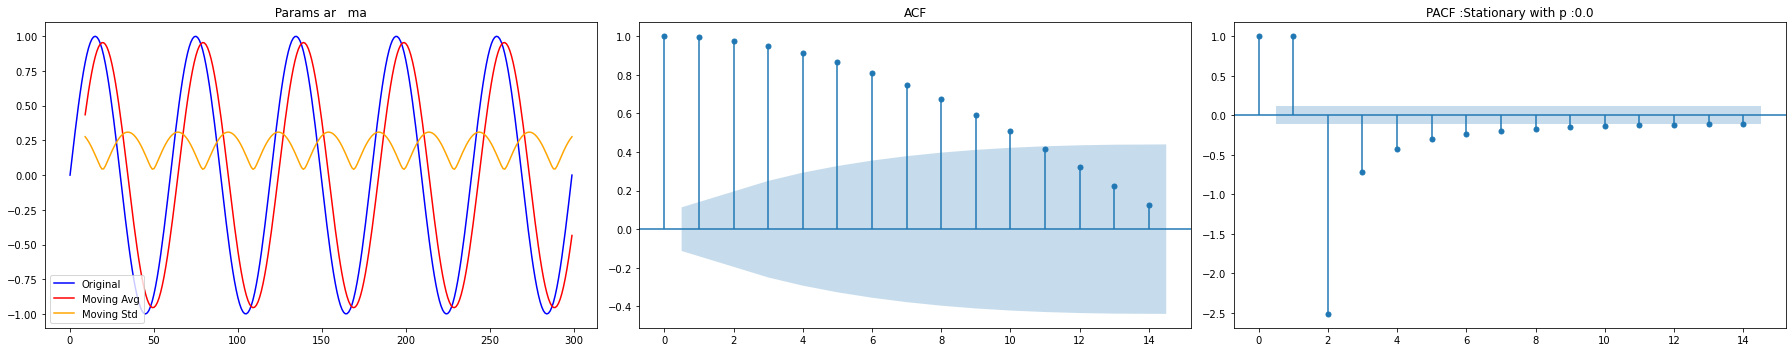

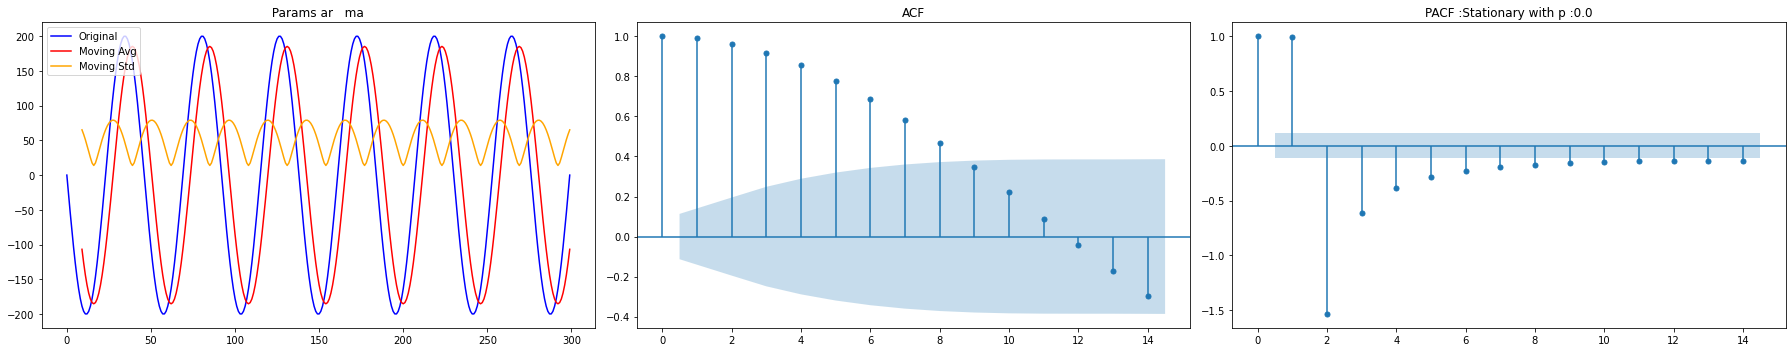

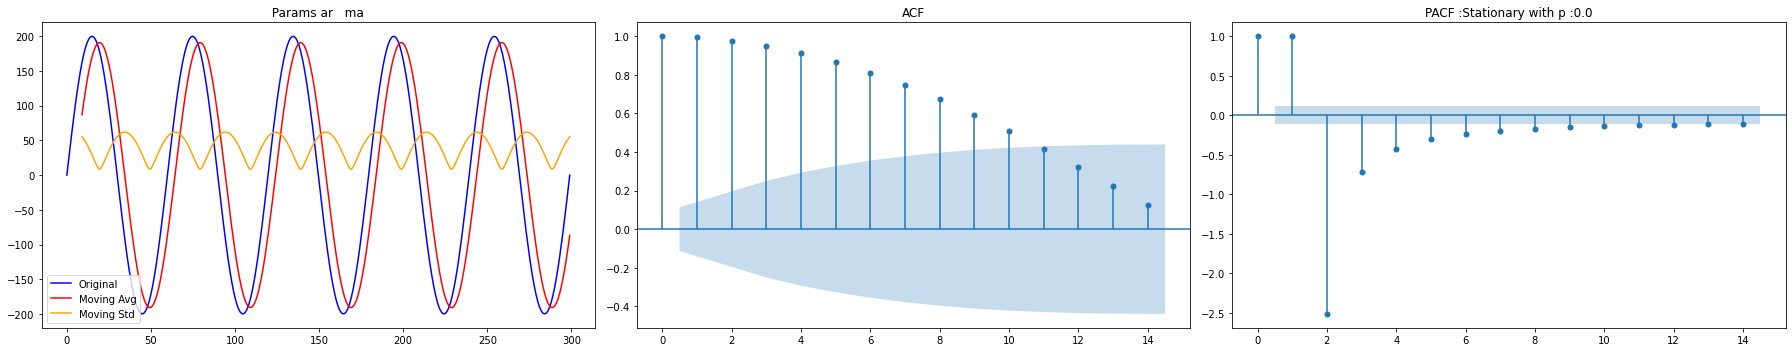

In [9]:
_ = plot_summary( "" ,"" ,lags=14, orig_data = sin_data1 )
_ = plot_summary( "" ,""  ,lags=14, orig_data = sin_data2 )

_ = plot_summary( "" ,""  ,lags=14, orig_data = sin_data3 )
_ = plot_summary( "" ,""  ,lags=14, orig_data = sin_data4 )

C:\Users\mcelikkaya\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\mcelikkaya\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\mcelikkaya\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\mcelikkaya\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


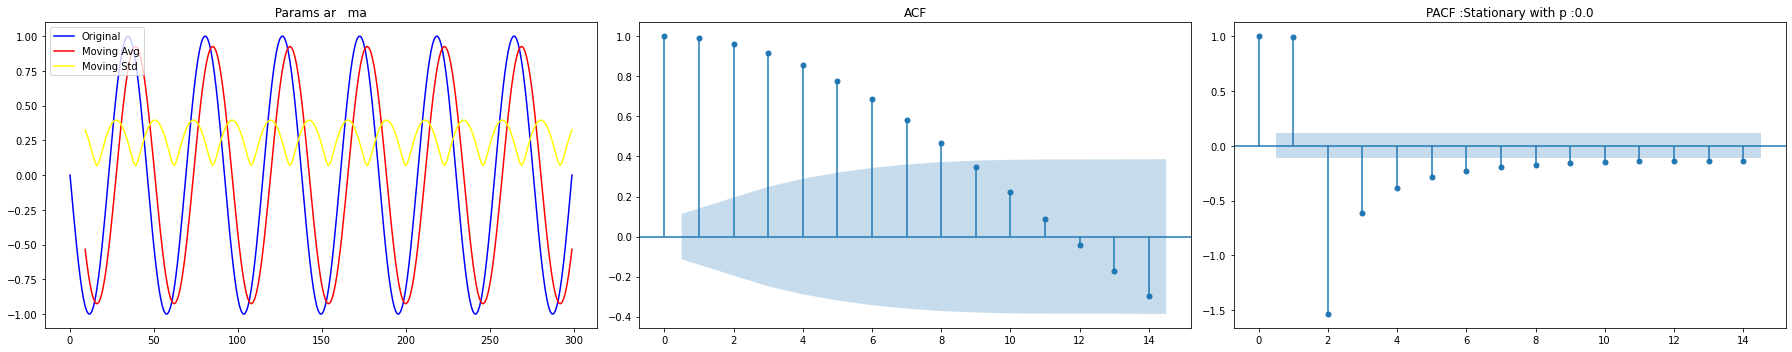

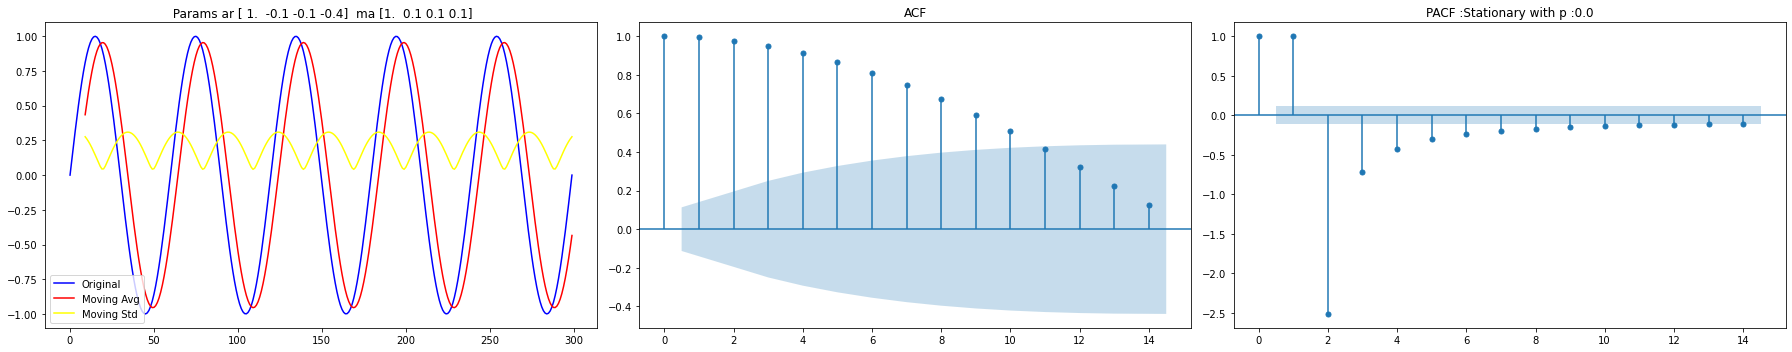

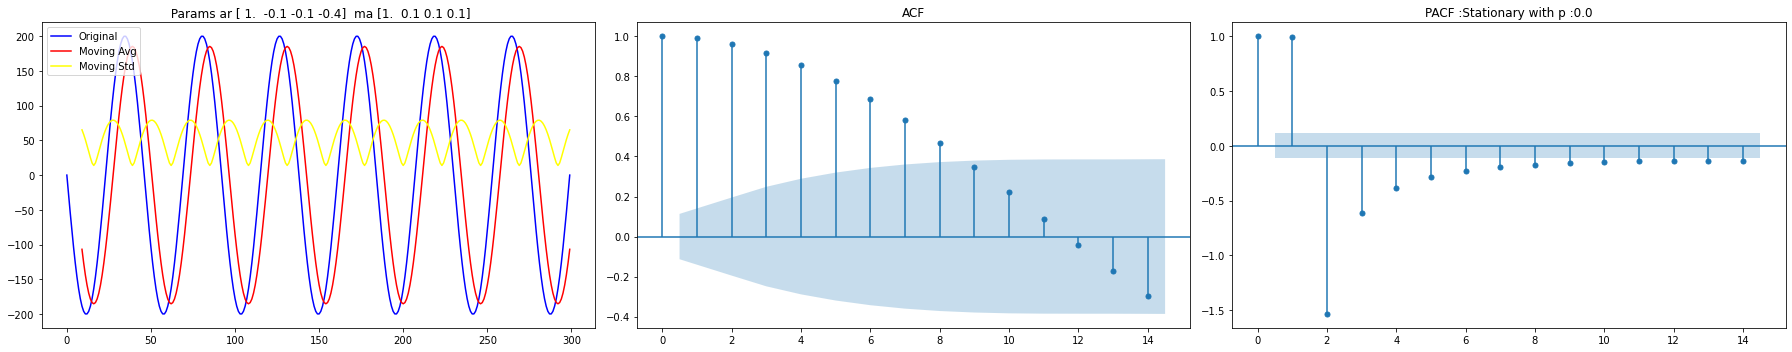

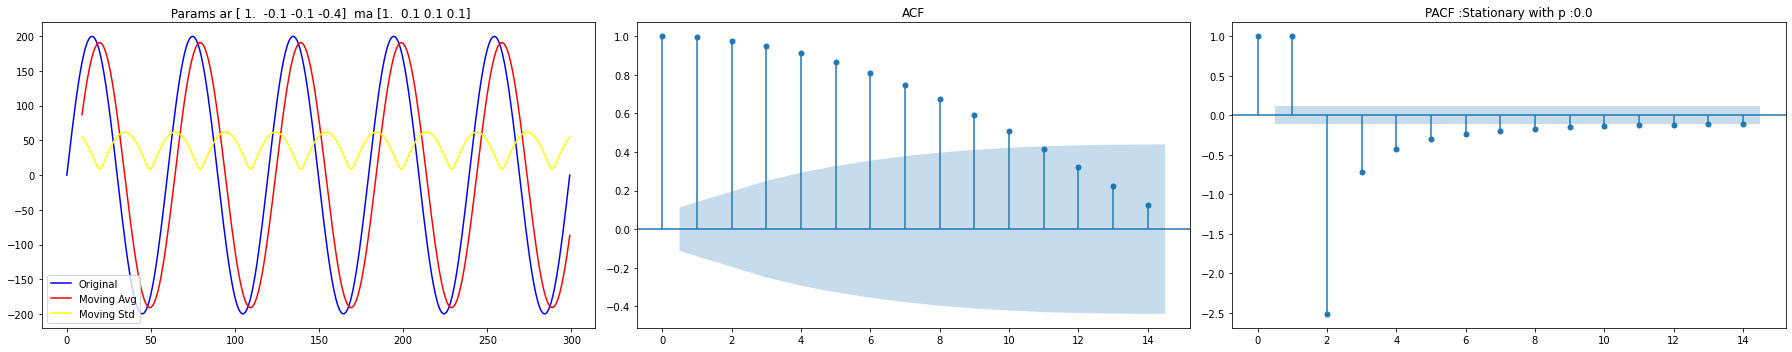

In [22]:
_ = plot_summary( "" ,"" ,lags=14, orig_data = sin_data1 )
_ = plot_summary( ar1 = np.array([1,-0.1,-0.1,max_relation]) ,ma1 = np.array([1,0.1,0.1,0.1]) ,lags=14, orig_data = sin_data2 )

_ = plot_summary( ar1 = np.array([1,-0.1,-0.1,max_relation]) ,ma1 = np.array([1,0.1,0.1,0.1]) ,lags=14, orig_data = sin_data3 )
_ = plot_summary( ar1 = np.array([1,-0.1,-0.1,max_relation]) ,ma1 = np.array([1,0.1,0.1,0.1]) ,lags=14, orig_data = sin_data4 )

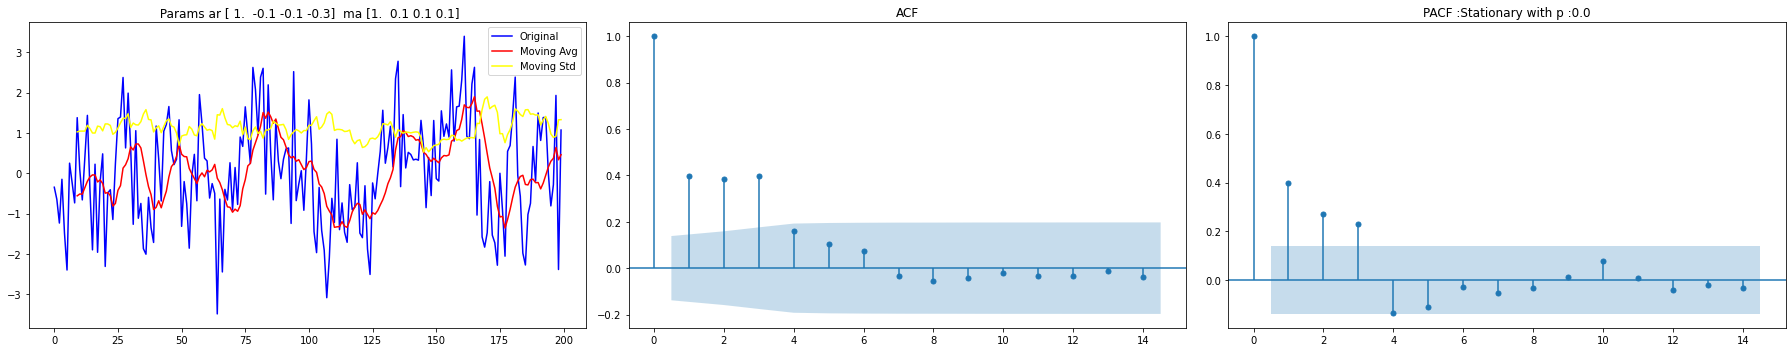

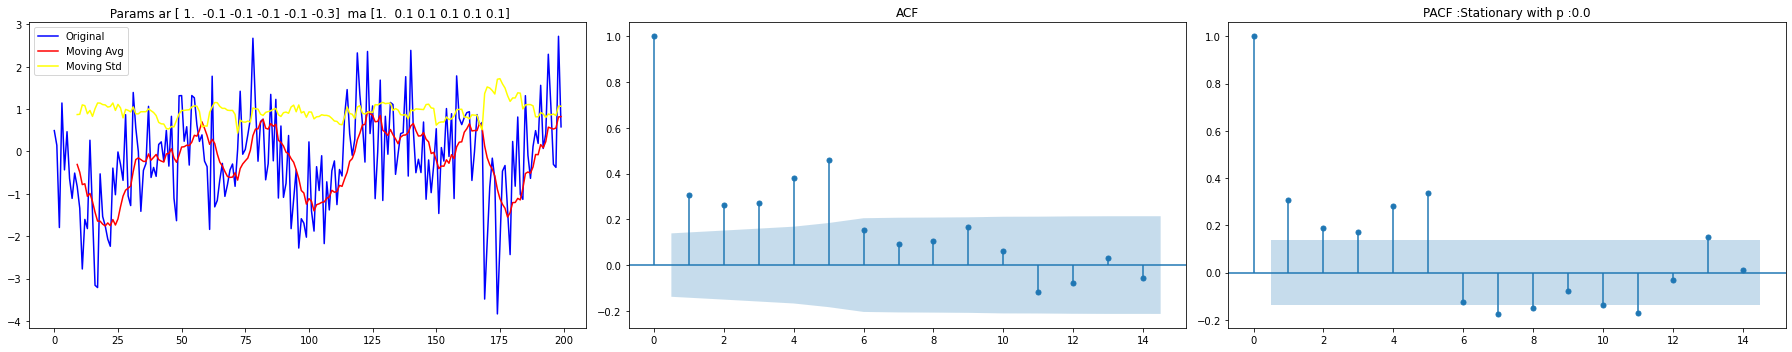

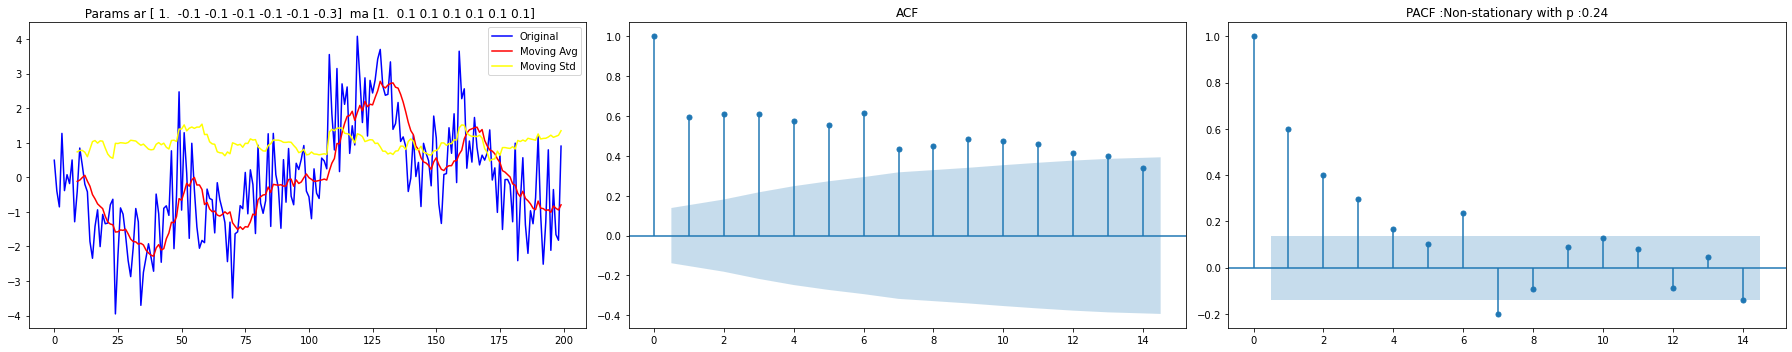

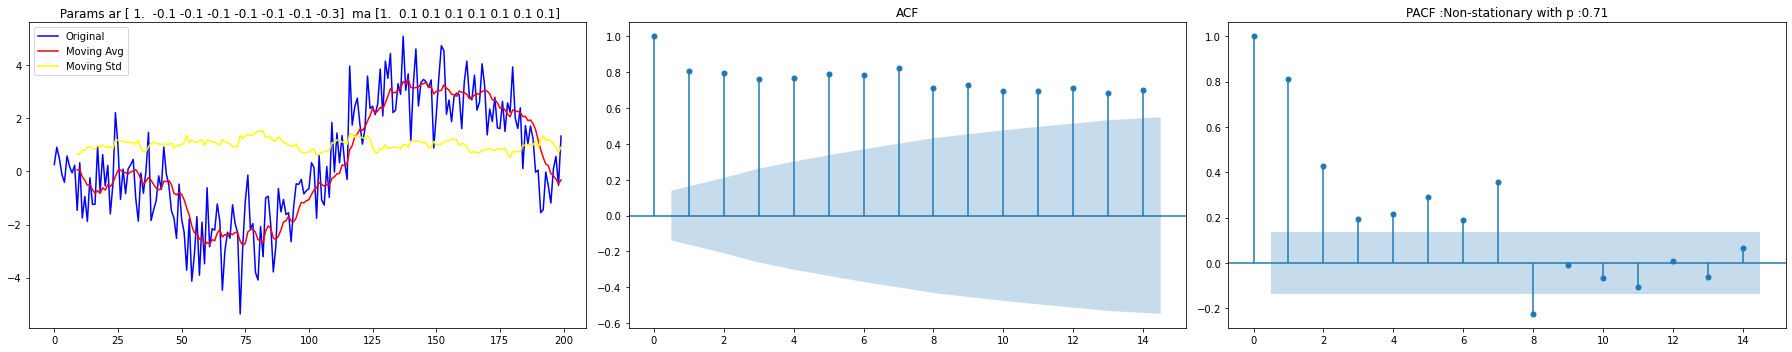

In [23]:
max_relation = -0.3
data = gen_arma_data( ar1 = np.array([1,-0.1,-0.1,max_relation]) ,ma1 = np.array([1,0.1,0.1,0.1]) ,lags=14)
data = gen_arma_data( ar1 = np.array([1,-0.1,-0.1,-0.1,max_relation]) ,ma1 = np.array([1,0.1,0.1,0.1,0.1]) ,lags=14)
data = gen_arma_data( ar1 = np.array([1,-0.1,-0.1,-0.1,-0.1,max_relation]) ,ma1 = np.array([1,0.1,0.1,0.1,0.1,0.1]) ,lags=14)
data = gen_arma_data( ar1 = np.array([1,-0.1,-0.1,-0.1,-0.1,-0.1,max_relation]) ,ma1 = np.array([1,0.1,0.1,0.1,0.1,0.1,0.1]) ,lags=14)
data = gen_arma_data( ar1 = np.array([1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,max_relation]) ,ma1 = np.array([1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]) ,lags=14)


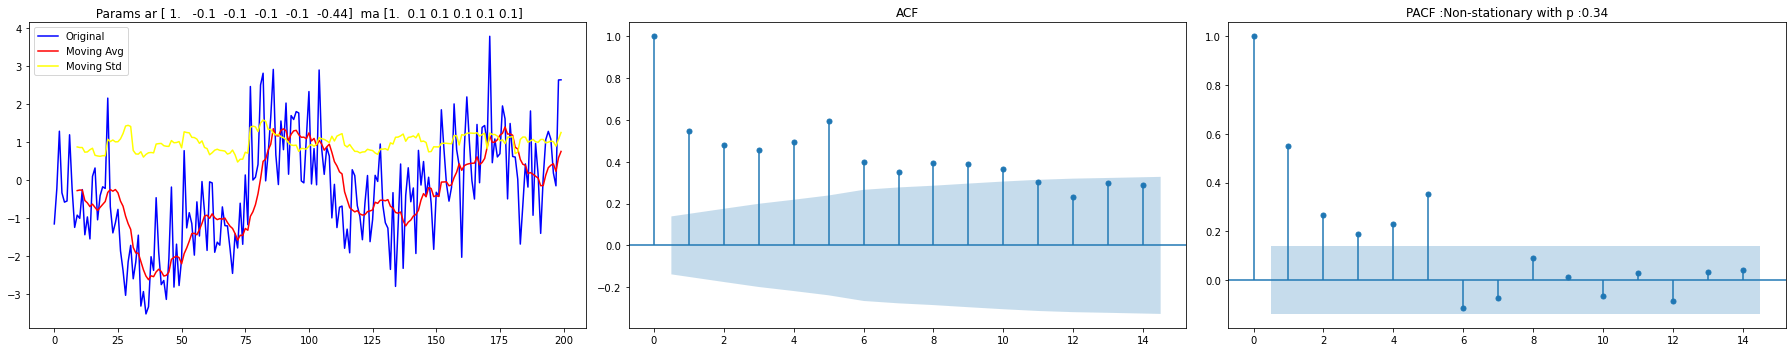

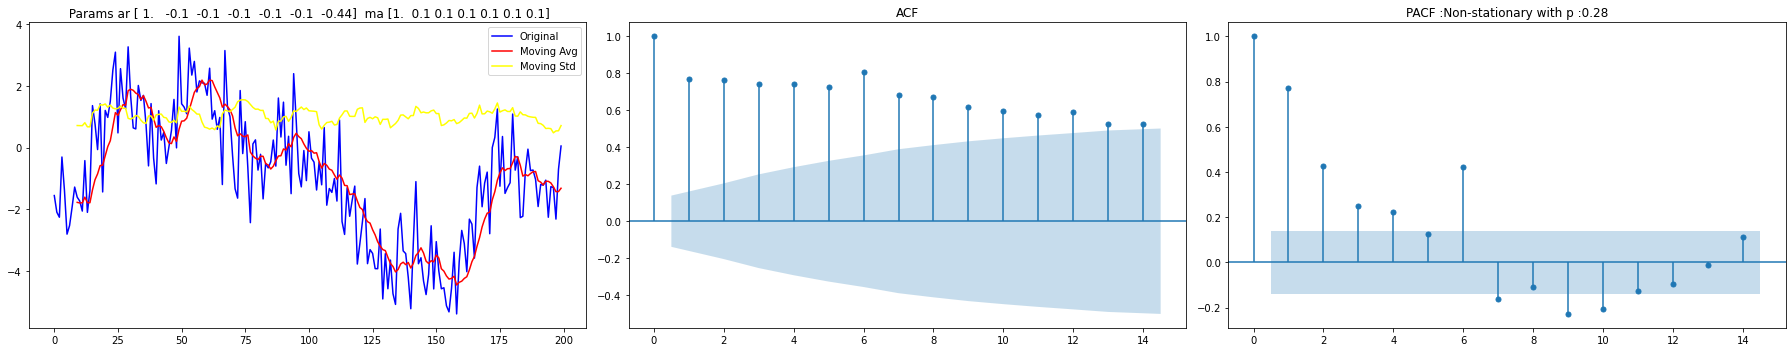

In [24]:
max_relation = -0.44
data = gen_arma_data( ar1 = np.array([1,-0.1,-0.1,max_relation]) ,ma1 = np.array([1,0.1,0.1,0.1]) ,lags=14)
data = gen_arma_data( ar1 = np.array([1,-0.1,-0.1,-0.1,max_relation]) ,ma1 = np.array([1,0.1,0.1,0.1,0.1]) ,lags=14)
data = gen_arma_data( ar1 = np.array([1,-0.1,-0.1,-0.1,-0.1,max_relation]) ,ma1 = np.array([1,0.1,0.1,0.1,0.1,0.1]) ,lags=14)
data = gen_arma_data( ar1 = np.array([1,-0.1,-0.1,-0.1,-0.1,-0.1,max_relation]) ,ma1 = np.array([1,0.1,0.1,0.1,0.1,0.1,0.1]) ,lags=14)
data = gen_arma_data( ar1 = np.array([1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,max_relation]) ,ma1 = np.array([1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]) ,lags=14)


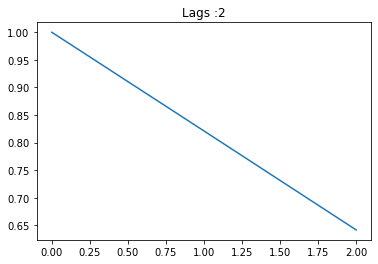

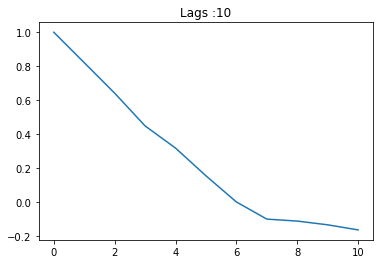

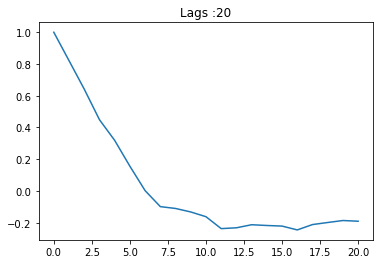

In [98]:
def dump_acf(orig_data,nlags):
  lag_acf = acf(orig_data, nlags=nlags) # MA 
  plt.title(f"Lags :{nlags}")
  plt.plot( lag_acf )
  plt.show()
  return lag_acf

def dump_pacf(orig_data,nlags):
  lag_acf = pacf(orig_data, nlags=nlags) # MA 
  plt.title(f"Lags :{nlags}")
  plt.plot( lag_acf )
  plt.show()  

arma_data1 = ArmaProcess([1,-0.9], [1,0.1]).generate_sample(nsample=20)
arma_data2 = ArmaProcess([1,-0.1], [1,0.1]).generate_sample(nsample=20)
arma_data = np.hstack( (arma_data1 , arma_data2))
plt.plot( arma_data )
plt.show()
dump_acf(arma_data, nlags=2) # MA 
dump_acf(arma_data, nlags=5) # MA 
dump_acf(arma_data, nlags=10) # MA 
dump_acf(arma_data, nlags=20) # MA 
dump_acf(arma_data, nlags=30) # MA 
_ = dump_acf(arma_data, nlags=35) # MA 


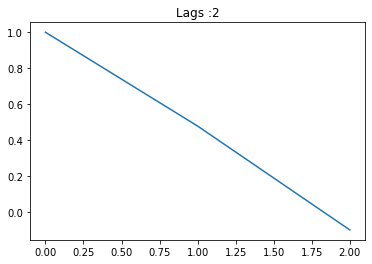

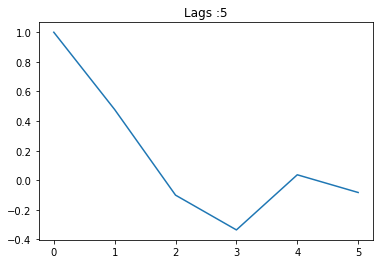

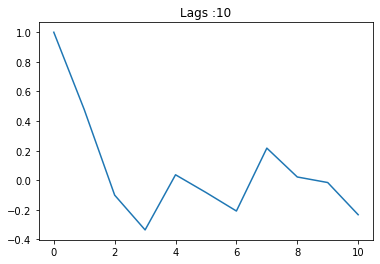

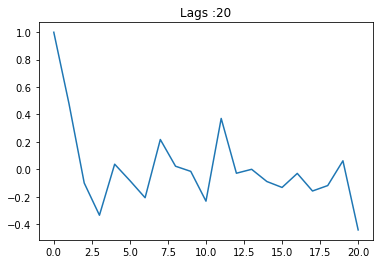

C:\Users\mcelikkaya\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


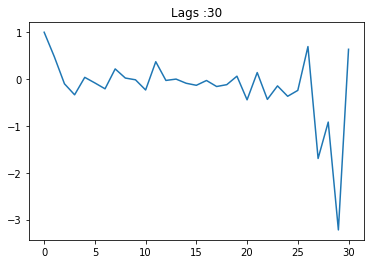

C:\Users\mcelikkaya\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


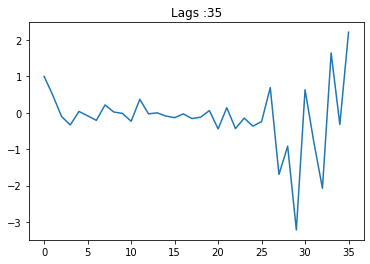

In [26]:
dump_pacf(simulated_ARMA_data, nlags=2) # MA 
dump_pacf(simulated_ARMA_data, nlags=5) # MA 
dump_pacf(simulated_ARMA_data, nlags=10) # MA 
dump_pacf(simulated_ARMA_data, nlags=20) # MA 
dump_pacf(simulated_ARMA_data, nlags=30) # MA 
dump_pacf(simulated_ARMA_data, nlags=35) # MA 

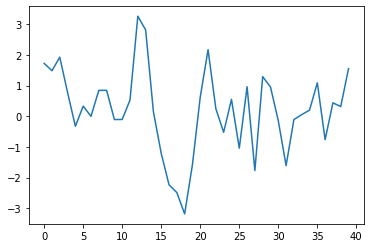

acf_hand -0.03905152626117896
results {'acf_by_hand': [1.0, 0.4777941644223381, 0.15076492210656559, -0.2249505911310255, -0.23436478015189308, -0.22617063791532396, -0.21417299447468113, 0.0038734658817871025, 0.11532466794077663, 0.21444826349664103]}


dd [ 1.          0.46584931  0.14322668 -0.2080793  -0.2109283  -0.19789931
 -0.18204705  0.00319561  0.09225973  0.1661974  -0.02928864]


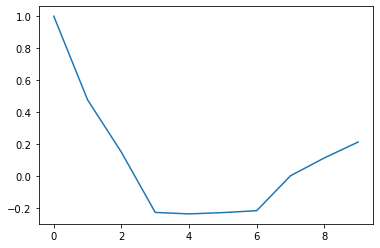

In [27]:
def acf_by_hand(x, lag):
    # Slice the relevant subseries based on the lag
    y1 = x[:(len(x)-lag)]
    y2 = x[lag:]
    #print("y1",y1.shape)
    #print("y2",y2.shape)
    # Subtract the mean of the whole series x to calculate Cov
    sum_product = np.sum((y1-np.mean(x))*(y2-np.mean(x)))
    #print("sum_product",sum_product," np.var(x) ",np.var(x))
    # Normalize with var of whole series
    return sum_product / ((len(x) - lag) * np.var(x))

#simulated_ARMA_data 
plt.plot( simulated_ARMA_data )
plt.show()

acf_hand = acf_by_hand( simulated_ARMA_data , 10)    

print("acf_hand",acf_hand)

results = {}
nlags=10
results["acf_by_hand"] = [acf_by_hand(simulated_ARMA_data, lag) for lag in range(nlags)]
print("results",results)

dd = dump_acf(simulated_ARMA_data, 10)
print("dd",dd)

plt.plot( results["acf_by_hand"] )
plt.show()